# {Breaking the Glass Firewall: Exploring Salary and Career Disparities Between Men and Women in Tech}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

This project investigates the disparities in salary, career opportunities, and workplace treatment between men and women in the tech industry. Despite having similar qualifications and experience, women in technology face significant barriers to reaching senior positions and earning competitive salaries compared to their male counterparts. Understanding these differences in career trajectories is essential for promoting fairness in the workplace, reducing turnover costs, and improving organizational success by retaining diverse talent.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How do salaries, workplace treatment, and job roles for women compare to those for men at similar career stages in the tech industry?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

**Hypothesis:**  
In the tech industry, women with similar qualifications and experience as men earn lower salaries, face more challenges in workplace treatment, and are often relegated to less senior roles. These disparities are influenced by factors that disproportionately affect women, including gender-based discrimination and limited access to career advancement opportunities. As a result, women are less likely than men to achieve competitive salaries or reach senior positions, impacting their long-term career trajectories and earning potential in the industry.

## Data Sources
*What data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

**Data Sources**  
- *HackerRank 2018 Developer Survey (Kaggle):* Published in 2018, based on 2017 survey responses. Primarily focuses on respondents' job roles and educational backgrounds, providing insights into positioning within the tech industry based on qualifications.  
- *Pew Research Center 2017 STEM Survey (zip file):* Based on 2017 responses, this survey includes data on gender representation and experiences in STEM fields.  
- *NSF's National Center for Science and Engineering Statistics (Web-Scraped Tables):* Covering data over multiple years, ending in 2019, with an emphasis on STEM workforce statistics.  
- *NSF's National Center for Science and Engineering Statistics (zip folders with xlsx files):* A supplementary set of tables spanning several years, ending in 2019, offering additional STEM field statistics.  
- *From College to Jobs American Community Survey 2019 (U.S. Census Bureau xls files):* Detailed data about occupations, salaries, gender, and educational backgrounds for a comprehensive view of career outcomes. 

**Relating the Data**  
- The datasets can be linked based on the shared timeframe (2017-2019) and gender as a common variable. 
- Gender will serve as a primary key or part of a composite key for linking. (Non-binary or unknown will be excluded from analysis.)
- Ages will be limited to the 25 - 64 range to match the American Community Survey data, ensuring consistency across employment data
- The analysis will focus on individuals who were employed at the time of each survey, and each dataset will be filtered accordingly.


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

After limiting each dataset to core demographics (e.g., country, age, gender, employment status, employment field), I will analyze trends across individual datasets, rather than combining them directly. This approach will allow me to observe patterns related to gender disparities without necessitating complex data joins.

**Planned Visualizations to Support the Hypothesis:**
1. *Line Chart: Gender and Age Distribution in Technology*  
A line chart will display the number of employees in the technology sector, separated by gender and age groups. The x-axis will represent the age groups (e.g., 20-25, 26-30, etc.), and the y-axis will show the number of employees. This chart will highlight the drop-off point where women begin to leave the industry earlier than men, helping visualize retention issues.

2. *100% Stacked Column Chart: Men vs Women in Different Tech Roles*  
A 100% stacked column chart will show the proportional representation of men and women across different tech roles (e.g., Junior Developers, Senior Developers, Managers, Executives). Each column will represent a different role, and the stacked columns will show the gender distribution within that role as a percentage. This will provide a clear visual of how underrepresented women are in higher-level positions.

3. *Side-by-Side Column Chart: Workplace Concerns for Men vs Women*  
A side-by-side column chart will compare the key workplace concerns between men and women, such as issues with career progression, work-life balance, pay disparity, and workplace discrimination. Each concern will have two columns—one representing men and one representing women. This will make it easy to see where concerns overlap and where significant differences exist between the genders.

### UPDATE: Plan Revisions After Exploratory Data Analysis:
- My initial plan required data joining; however, after further analysis, I found that filtering each dataset for common demographics provided a more straightforward and effective trend analysis without combining datasets. This streamlined approach aligns with the project’s analytical goals.
- During exploratory data analysis, I adjusted some visualizations to better align with the patterns emerging in the raw data.

#### Package Imports

In [1]:
#import packages
import os # to create subfolder for data organization
from dotenv import load_dotenv
load_dotenv(override=True)

import opendatasets as od
import pandas as pd
import numpy as np
import pyreadstat
import requests
import re # for string manipulation

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from zipfile import ZipFile
from urllib.request import urlretrieve
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from docx import Document


#### Import Dataset 1: HackerRank Developer Survey Published in 2018 that covered 2017 Questionnaire Responses

In [2]:
# import dataset from Kaggle using URL 
dataset_url = "https://www.kaggle.com/datasets/hackerrank/developer-survey-2018/data"
od.download(dataset_url, data_dir="./data")

Skipping, found downloaded files in "./data\developer-survey-2018" (use force=True to force download)


#### Convert dataset to a pandas dataframe and inspect data for Exploratory Data Analysis (EDA)

In [3]:
# Define the data directory
data_dir = './data/developer-survey-2018'

# Read each CSV file into its own DataFrame with meaningful names
country_code_df = pd.read_csv(os.path.join(data_dir, 'Country-Code-Mapping.csv'))
dev_survey_codebook_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Codebook.csv'))
dev_survey_numeric_mapping_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Numeric-Mapping.csv'))
dev_survey_numeric_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Numeric.csv'))
dev_survey_values_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Values.csv'))

# Display the first 5 records from each DataFrame
display(country_code_df.head(5))
display(dev_survey_codebook_df.head(5))
display(dev_survey_numeric_mapping_df.head(5))
display(dev_survey_numeric_df.head(5))
display(dev_survey_values_df.head(5))

C:\Users\Michelle\AppData\Local\Temp\ipykernel_42932\3349565919.py:8: DtypeWarning: Columns (10,19,137,138,250) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_survey_numeric_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Numeric.csv'))
C:\Users\Michelle\AppData\Local\Temp\ipykernel_42932\3349565919.py:9: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  dev_survey_values_df = pd.read_csv(os.path.join(data_dir, 'HackerRank-Developer-Survey-2018-Values.csv'))


,Value,Label
0,4,Afghanistan
1,6,Albania
2,7,Algeria
3,8,American Samoa
4,9,Andorra


,Data Field,Survey Question,Notes
0,RespondentID,NaN,Respondent ID
1,StartDate,NaN,When did they start (date and time)
2,EndDate,NaN,When did they end (date and time)
3,CountryNumeric2,NaN,see Country-Code-Mapping.csv
4,q1AgeBeginCoding,At what age did you start coding,NaN


,Data Field,Value,Label
0,q1AgeBeginCoding,1,5 - 10 years old
1,q1AgeBeginCoding,2,11 - 15 years old
2,q1AgeBeginCoding,3,16 - 20 years old
3,q1AgeBeginCoding,4,21 - 25 years old
4,q1AgeBeginCoding,5,26 - 30 years old


,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,148.0,3,3,2,3,NaN,1,...,1,datacamp,1,1,NaN,2,NaN,#NULL!,NaN,2
1,6478031510,10/26/17 6:18,10/26/17 7:49,164.0,3,4,1,7,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
2,6464392829,10/19/17 10:44,10/19/17 10:56,98.0,2,2,2,3,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
3,6481629912,10/27/17 1:51,10/27/17 2:05,43.0,2,2,1,5,NaN,1,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,3
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,3,4,2,5,NaN,0,...,1,Blogs/articles by industry leaders,1,1,NaN,2,NaN,#NULL!,NaN,3


,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
0,6464453728,10/19/17 11:51,10/20/17 12:05,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,NaN,Computer Science,...,Other (please specify),datacamp,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
1,6478031510,10/26/17 6:18,10/26/17 7:49,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)",NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
2,6464392829,10/19/17 10:44,10/19/17 10:56,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
3,6481629912,10/27/17 1:51,10/27/17 2:05,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap
4,6488385057,10/31/17 11:46,10/31/17 11:59,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,NaN,...,Other (please specify),Blogs/articles by industry leaders,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Hashmap


#### Exploratory Data Analysis (EDA) Insights:
- The dataset is global, not local, meaning it does not precisely align with my other datasets.
    - Information from the country_code_df can be used to identify the country code and country name format so I can filter the other dataframes to only include the United States
- The datset includes NaN values in several fields including the country. 
    - Data will need to be explored further to determine the handling of NaN or #NULL! values
        - For example, if the NaN or NULL value is in gender or country, it cannot be determined using other methods and needs to be excluded from analysis. However,
        if the NaN or NULL is in the Job Level or Current Rank field, I may be able to populate those fields based on data from similar records.
- The Numeric and Values datasets have identical infomation, just in different formats.
    - In the Numeric dataset, all of the values are numerically coded.
    - In the Values dataset, all of the responses are in plain English.
- There are outliers in this data as far as what can be directly related to my other datasets and my hypothesis for the purpose of analysis.
    - Age ranges will need to be limited to match what is available in the datasets from other sources to make "apples to apples" comparisons.

In [4]:
# Find United States in the country_code_df to use for filtering purposes

# Rename columns
country_code_df.rename(columns={'Value': 'country_code', 'Label': 'country'}, inplace=True)

# Filter for the United States
us_country_code_df = country_code_df[country_code_df['country'] == 'United States']

# Display the resulting DataFrame
display(us_country_code_df)

,country_code,country
145,167,United States


#### Filtered dataframe to include only respondents in the United States

In [5]:
# Filter the DataFrame for United States questionnaire responses
us_dev_survey_numeric_df = dev_survey_numeric_df[dev_survey_numeric_df['CountryNumeric2'] == 167]

# Display the number of records
num_records_numeric = us_dev_survey_numeric_df.shape[0]
display(f"Number of records: {num_records_numeric}")

# Display the resulting DataFrame
display(us_dev_survey_numeric_df.head(5))

'Number of records: 4937'

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
5,6463843138,10/19/17 3:02,10/19/17 3:18,167.0,8,5,1,5,NaN,1,...,1,SoloLearn,1,1,NaN,2,NaN,#NULL!,NaN,2
6,6458326054,10/17/17 3:18,10/17/17 3:33,167.0,3,6,1,7,NaN,1,...,0,NaN,1,1,NaN,1,1.0,4,NaN,2
7,6467198274,10/21/17 8:55,10/21/17 9:06,167.0,3,3,1,5,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,1
24,6460870080,10/18/17 1:18,10/18/17 1:25,167.0,3,3,1,5,NaN,2,...,0,NaN,1,1,NaN,2,NaN,#NULL!,NaN,2
40,6479693460,10/26/17 7:10,10/26/17 7:20,167.0,2,6,1,5,NaN,1,...,1,IRC,1,1,NaN,2,NaN,#NULL!,NaN,2


#### Reduce dataframe columns to only those relevant to supporting or disproving my hypothesis
- fields such as date survey was completed and questions about the HackerRank survey were removed from dataframe for simplification

In [6]:
# List of relevant columns to keep
columns_to_keep = [
    'RespondentID', 'q2Age', 'q3Gender', 'q10Industry',
    'q8JobLevel', 'q9CurrentRole',
    'q12JobCritPrefTechStack', 'q12JobCritCompMission',
    'q12JobCritCompCulture', 'q12JobCritWorkLifeBal',
    'q12JobCritCompensation', 'q12JobCritProximity',
    'q12JobCritPerks', 'q12JobCritSmartPeopleTeam',
    'q12JobCritImpactwithProduct', 'q12JobCritInterestProblems',
    'q12JobCritFundingandValuation', 'q12JobCritStability',
    'q12JobCritProfGrowth', 'q16HiringManager',
    'q17HirChaNoDiversCandidates', 'q20CandYearExp',
    'q20CandCompScienceDegree', 'q20CandCodingBootcamp',
    'q20CandSkillCert', 'q20CandHackerRankActivity',
    'q20CandOtherCodingCommAct', 'q20CandGithubPersProj',
    'q20CandOpenSourceContrib', 'q20CandHackathonPart',
    'q20CandPrevWorkExp', 'q20CandPrestigeDegree',
    'q20CandLinkInSkills', 'q20CandGithubPersProj2'
]

# Create a new DataFrame with only the selected columns
filtered_us_dev_survey_numeric_df = us_dev_survey_numeric_df[columns_to_keep]

# Display information about the DataFrame 
filtered_us_dev_survey_numeric_df.info()

# Display the resulting DataFrame
display(filtered_us_dev_survey_numeric_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 5 to 9892
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RespondentID                   4937 non-null   int64 
 1   q2Age                          4937 non-null   object
 2   q3Gender                       4937 non-null   object
 3   q10Industry                    4937 non-null   object
 4   q8JobLevel                     4937 non-null   int64 
 5   q9CurrentRole                  4937 non-null   object
 6   q12JobCritPrefTechStack        4937 non-null   int64 
 7   q12JobCritCompMission          4937 non-null   int64 
 8   q12JobCritCompCulture          4937 non-null   int64 
 9   q12JobCritWorkLifeBal          4937 non-null   int64 
 10  q12JobCritCompensation         4937 non-null   int64 
 11  q12JobCritProximity            4937 non-null   int64 
 12  q12JobCritPerks                4937 non-null   int64 
 13  q12JobCr

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
5,6463843138,5,1,14,0,0,0,0,1,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
6,6458326054,6,1,5,9,19,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
7,6467198274,3,1,4,2,0,0,0,1,0,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
24,6460870080,3,1,0,1,18,0,0,0,1,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
40,6479693460,6,1,14,10,11,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#### Check for Duplicate Records
- Some records will be similar, but all records should have a unique RespondentID

In [7]:
# Check for duplicates in the RespondentID field
duplicates = filtered_us_dev_survey_numeric_df[filtered_us_dev_survey_numeric_df.duplicated('RespondentID', keep=False)]

# Count the number of duplicate RespondentIDs
num_duplicates = duplicates.shape[0]

# Display the duplicates if any
if num_duplicates > 0:
    print(f"Number of duplicate records found: {num_duplicates}")
    display(duplicates[['RespondentID']])
else:
    print("No duplicate records found in RespondentID.")

No duplicate records found in RespondentID.


#### Filter DataFrame to be Consistent with American Community Survey Parameters for Data Matching
- Remove ages under 25 years old (coded as q2Age: 1, 2, or 3)
- Remove ages over 64 years old (coded as q2Age: 8 or 9)
- Remove non-binary respondents (coded as q3Gender: 3)

In [8]:
# Summary of counts for each value in q2Age
age_summary = filtered_us_dev_survey_numeric_df['q2Age'].value_counts(dropna=False)
print("Summary of counts for each value in q2Age:")
print(age_summary)

# Summary of counts for each value in q3Gender
gender_summary = filtered_us_dev_survey_numeric_df['q3Gender'].value_counts(dropna=False)
print("\nSummary of counts for each value in q3Gender:")
print(gender_summary)

Summary of counts for each value in q2Age:
q2Age
4         2067
3         1791
5          647
6          194
2          160
7           57
#NULL!      11
8            6
9            2
1            2
Name: count, dtype: int64

Summary of counts for each value in q3Gender:
q3Gender
1         3889
2         1000
3           35
#NULL!      13
Name: count, dtype: int64


In [9]:
# Remove records where q2Age is #NULL!, 1, 2, 3, 8, or 9
filtered_us_dev_survey_numeric_df = filtered_us_dev_survey_numeric_df[
    ~filtered_us_dev_survey_numeric_df['q2Age'].isin(['#NULL!', '1', '2', '3', '8', '9'])
]

# Remove records where q3Gender is #NULL! or 3
filtered_us_dev_survey_numeric_df = filtered_us_dev_survey_numeric_df[
    ~filtered_us_dev_survey_numeric_df['q3Gender'].isin(['#NULL!', '3'])
]

# Display the row count of the refined DataFrame
row_count_after_filtering = filtered_us_dev_survey_numeric_df.shape[0]
print(f"Row count after filtering: {row_count_after_filtering}")

# New summary of counts for each value in q2Age
age_summary = filtered_us_dev_survey_numeric_df['q2Age'].value_counts(dropna=False)
print("New summary of counts for each value in q2Age:")
print(age_summary)

# Summary of counts for each value in q3Gender
gender_summary = filtered_us_dev_survey_numeric_df['q3Gender'].value_counts(dropna=False)
print("\nNew summary of counts for each value in q3Gender:")
print(gender_summary)

Row count after filtering: 2942
New summary of counts for each value in q2Age:
q2Age
4    2049
5     642
6     194
7      57
Name: count, dtype: int64

New summary of counts for each value in q3Gender:
q3Gender
1    2413
2     529
Name: count, dtype: int64


#### Exploratory Data Analysis (EDA)
- Begin renaming columns
- The numeric dataframe should consist entirely of int64 data types, yet the majority have an "object" data type instead.
    - These datatypes will need to be converted for certain types of analysis like a correlation matrix.

In [10]:
# Rename columns
filtered_us_dev_survey_numeric_df.rename(columns={
    'q2Age': 'Age',
    'q3Gender': 'Gender',
    'q10Industry': 'Industry',
    'q8JobLevel': 'Job Level',
    'q9CurrentRole': 'Current Role',
    'q10Industry': 'Industry',
    'q12JobCritPrefTechStack': 'Job Search Priority - Preferred Tech Stack',
    'q12JobCritCompMission': 'Job Search Priority - Company Mission',
    'q12JobCritCompCulture': 'Job Search Priority - Company Culture',
    'q12JobCritWorkLifeBal': 'Job Search Priority - Work-Life Balance',
    'q12JobCritCompensation': 'Job Search Priority - Compensation',
    'q12JobCritProximity': 'Job Search Priority - Proximity to Home',
    'q12JobCritPerks': 'Job Search Priority - Perks',
    'q12JobCritSmartPeopleTeam': 'Job Search Priority - Smart Workers',
    'q12JobCritImpactwithProduct': 'Job Search Priority - Product Impact',
    'q12JobCritInterestProblems': 'Job Search Priority - Interesting Problems to Solve',
    'q12JobCritFundingandValuation': 'Job Search Priority - Funding and Valuation',
    'q12JobCritStability': 'Job Search Priority - Stability of Large Company',
    'q12JobCritProfGrowth': 'Job Search Priority - Professional Growth and Learning',
    'q16HiringManager': 'Hiring Manager (Y/N)'
}, inplace=True)

# Convert all columns to Int64 
filtered_us_dev_survey_numeric_df = filtered_us_dev_survey_numeric_df.apply(pd.to_numeric, errors='coerce').astype('Int64')

# Display the resulting Numeric DataFrame and info
print("Revised Numeric DataFrame (No Splitting, Renamed Columns):")
display(filtered_us_dev_survey_numeric_df.info())
display(filtered_us_dev_survey_numeric_df.head(5))


Revised Numeric DataFrame (No Splitting, Renamed Columns):
<class 'pandas.core.frame.DataFrame'>
Index: 2942 entries, 5 to 9890
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   RespondentID                                            2942 non-null   Int64
 1   Age                                                     2942 non-null   Int64
 2   Gender                                                  2942 non-null   Int64
 3   Industry                                                2922 non-null   Int64
 4   Job Level                                               2942 non-null   Int64
 5   Current Role                                            2942 non-null   Int64
 6   Job Search Priority - Preferred Tech Stack              2942 non-null   Int64
 7   Job Search Priority - Company Mission                   2942 non-null   Int64
 8   Job 

None

,RespondentID,Age,Gender,Industry,Job Level,Current Role,Job Search Priority - Preferred Tech Stack,Job Search Priority - Company Mission,Job Search Priority - Company Culture,Job Search Priority - Work-Life Balance,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
5,6463843138,5,1,14,0,0,0,0,1,1,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,6458326054,6,1,5,9,19,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
40,6479693460,6,1,14,10,11,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
42,6463550038,4,1,5,5,9,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
43,6480657500,4,1,11,6,11,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


#### Matplotlib Stacked Bar Chart: Job Criteria Priorities by Gender (Normalized)
**Purpose:** Compare the importance of various job criteria between men and women in the technology sector, using a stacked bar chart that has been normalized to account for the gender imbalance of respondents in the dataset.

**Insights:**
- **Work-Life Balance as Top Priority:** *Work-Life Balance* ranks as the highest priority for women (60.1%) and is also highly valued by men (56%). This could reflect broader societal expectations, where women are often primary caretakers, balancing professional responsibilities with family obligations. While this dataset doesn’t confirm this directly, it aligns with common trends observed in gender studies.
- **Professional Growth and Learning Priority:** Women place a significantly higher value on *Professional Growth and Learning* (54.6%) compared to men (44.9%). This aligns with findings from the Pew Research Center, suggesting that women, who often face challenges with gender discrimination, prioritize opportunities for advancement and skill development more heavily.
- **Company Culture Importance:** *Company Culture* ranks higher for women (44.2%) than for men (39.0%), possibly reflecting women’s desire for supportive and inclusive workplace environments in light of reported experiences of exclusion and discrimination.
- **Compensation Comparison:** For women, *Compensation* is the fourth most important job criterion (41.2%), following *Work-Life Balance* (60.1%), *Professional Growth and Learning* (54.6%), and *Company Culture* (44.2%). This suggests that while pay disparities are significant, women may prioritize job factors that foster long-term satisfaction and career advancement over salary alone when choosing an employer.
- **Low-Value Criteria for Both Genders:** *Funding and Valuation*, *Stability of a Large Company*, and *Perks* all show low prioritization across both genders, with less than 10% of respondents marking them as essential. This indicates that while job security and benefits matter, they are not primary factors in job selection for either group.

**Summary:** The findings reinforce the hypothesis that women in tech value career advancement opportunities, inclusive workplace culture, and work-life balance over compensation alone. These insights highlight the importance of creating growth-oriented, flexible, and supportive environments to retain female talent in the technology industry.

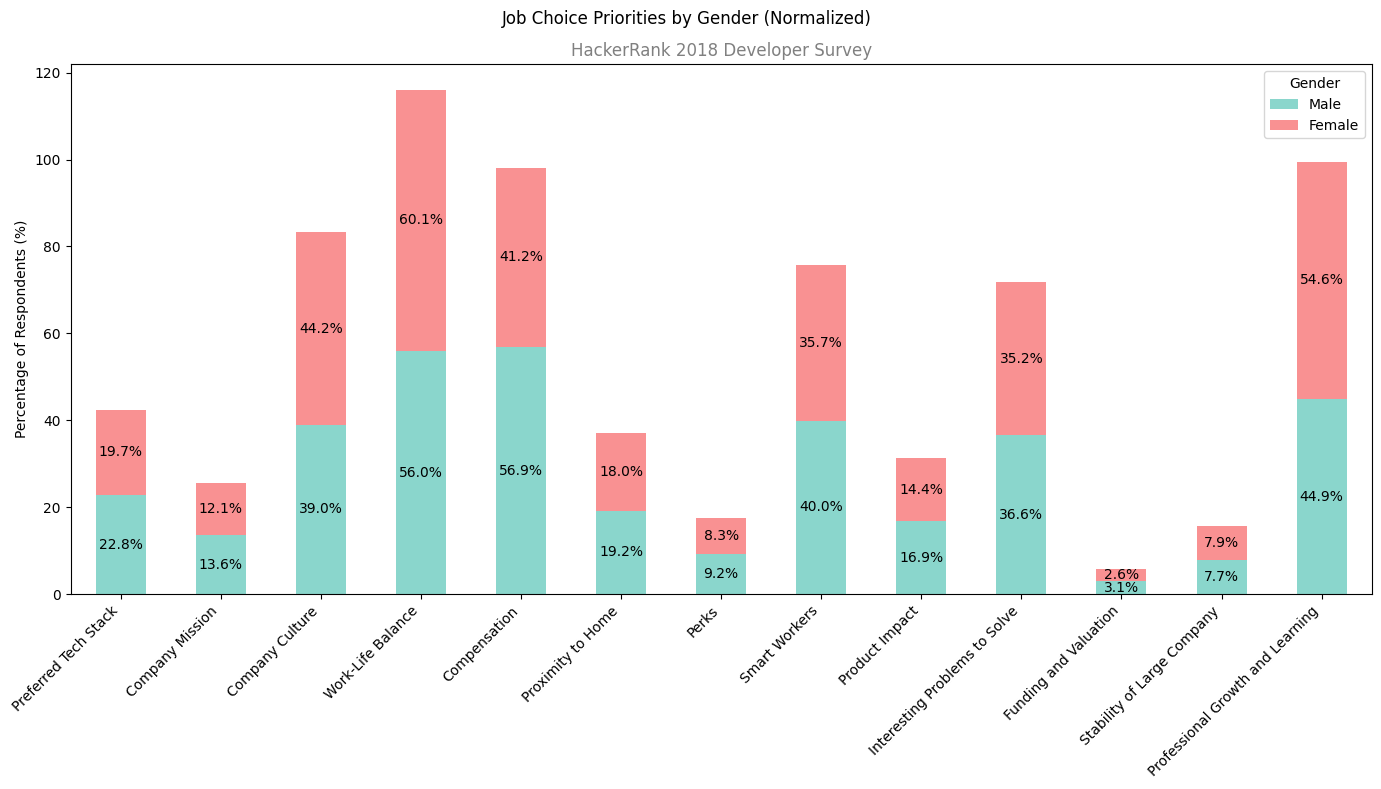

In [11]:
# Define a dictionary mapping the actual DataFrame column names to the desired display names
column_display_names = {
    'Job Search Priority - Preferred Tech Stack': 'Preferred Tech Stack',
    'Job Search Priority - Company Mission': 'Company Mission',
    'Job Search Priority - Company Culture': 'Company Culture',
    'Job Search Priority - Work-Life Balance': 'Work-Life Balance',
    'Job Search Priority - Compensation': 'Compensation',
    'Job Search Priority - Proximity to Home': 'Proximity to Home',
    'Job Search Priority - Perks': 'Perks',
    'Job Search Priority - Smart Workers': 'Smart Workers',
    'Job Search Priority - Product Impact': 'Product Impact',
    'Job Search Priority - Interesting Problems to Solve': 'Interesting Problems to Solve',
    'Job Search Priority - Funding and Valuation': 'Funding and Valuation',
    'Job Search Priority - Stability of Large Company': 'Stability of Large Company',
    'Job Search Priority - Professional Growth and Learning': 'Professional Growth and Learning'
}

# Select only the job criteria columns, excluding the "Other" column
job_criteria_columns = list(column_display_names.keys())

# Group data by gender and sum up the counts for each job criteria
criteria_counts = filtered_us_dev_survey_numeric_df.groupby('Gender')[job_criteria_columns].sum()

# Calculate the total number of male and female respondents
total_counts_by_gender = filtered_us_dev_survey_numeric_df['Gender'].value_counts()

# Normalize the data by calculating the percentage of each job criterion per gender
# This step addresses the disparity between male and female respondents
criteria_percentages = criteria_counts.div(total_counts_by_gender, axis=0) * 100

# Rename gender values for readability if needed
criteria_percentages.index = criteria_percentages.index.map({1: 'Male', 2: 'Female'})

# Rename columns in the DataFrame for plotting
criteria_percentages = criteria_percentages.rename(columns=column_display_names)

# Plotting the normalized stacked bar chart
ax = criteria_percentages.T.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#8ad6cc', '#f99192'])
plt.suptitle('Job Choice Priorities by Gender (Normalized)')
plt.title('HackerRank 2018 Developer Survey', fontsize=12, color='gray')
plt.ylabel('Percentage of Respondents (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding percentage labels to each section of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

## Repeat filtering logic from numeric version of data on the values version of the data
- Both datasets contain the same records, but one has numeric codes for all responses and the other has plain language values for all responses 
so the same logic can be used for both dataframes.

In [12]:
# Filter the DataFrame for CountryNumeric2 = "United States"
us_dev_survey_values_df = dev_survey_values_df[dev_survey_values_df['CountryNumeric2'] == "United States"]

# Display the number of records
num_records_values = us_dev_survey_values_df.shape[0]
display(f"Number of records: {num_records_values}")

# Display the resulting DataFrame
display(us_dev_survey_values_df.head(5))

'Number of records: 4937'

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,...,q30LearnCodeOther,q0030_other,q31Level3,q32RecommendHackerRank,q0032_other,q33HackerRankChallforJob,q34PositiveExp,q34IdealLengHackerRankTest,q0035_other,q36Level4
5,6463843138,10/19/17 3:02,10/19/17 3:18,United States,41 - 50 years old,35 - 44 years old,Male,College graduate,NaN,Computer Science,...,Other (please specify),SoloLearn,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
6,6458326054,10/17/17 3:18,10/17/17 3:33,United States,16 - 20 years old,45 - 54 years old,Male,"Post graduate degree (Masters, PhD)",NaN,Computer Science,...,NaN,NaN,num%2 == 0,Yes,NaN,Yes,1.0,2 to 4 hours,NaN,Queue
7,6467198274,10/21/17 8:55,10/21/17 9:06,United States,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Set
24,6460870080,10/18/17 1:18,10/18/17 1:25,United States,16 - 20 years old,18 - 24 years old,Male,College graduate,NaN,"Other STEM (science, technology, engineering, ...",...,NaN,NaN,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue
40,6479693460,10/26/17 7:10,10/26/17 7:20,United States,11 - 15 years old,45 - 54 years old,Male,College graduate,NaN,Computer Science,...,Other (please specify),IRC,num%2 == 0,Yes,NaN,No,NaN,#NULL!,NaN,Queue


In [13]:
# Reduce dataframe columns to only those relevant to supporting or disproving my hypothesis

# List of relevant columns to keep
columns_to_keep = [
    'RespondentID', 'q2Age', 'q3Gender', 'q10Industry',
    'q8JobLevel', 'q9CurrentRole',
    'q12JobCritPrefTechStack', 'q12JobCritCompMission',
    'q12JobCritCompCulture', 'q12JobCritWorkLifeBal',
    'q12JobCritCompensation', 'q12JobCritProximity',
    'q12JobCritPerks', 'q12JobCritSmartPeopleTeam',
    'q12JobCritImpactwithProduct', 'q12JobCritInterestProblems',
    'q12JobCritFundingandValuation', 'q12JobCritStability',
    'q12JobCritProfGrowth', 'q16HiringManager',
    'q17HirChaNoDiversCandidates', 'q20CandYearExp',
    'q20CandCompScienceDegree', 'q20CandCodingBootcamp',
    'q20CandSkillCert', 'q20CandHackerRankActivity',
    'q20CandOtherCodingCommAct', 'q20CandGithubPersProj',
    'q20CandOpenSourceContrib', 'q20CandHackathonPart',
    'q20CandPrevWorkExp', 'q20CandPrestigeDegree',
    'q20CandLinkInSkills', 'q20CandGithubPersProj2'
]

# Create a new DataFrame with only the selected columns
filtered_us_dev_survey_values_df = us_dev_survey_values_df[columns_to_keep]

# Display information about the DataFrame 
filtered_us_dev_survey_values_df.info()

# Display the resulting DataFrame
display(filtered_us_dev_survey_values_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 5 to 9892
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RespondentID                   4937 non-null   int64 
 1   q2Age                          4937 non-null   object
 2   q3Gender                       4937 non-null   object
 3   q10Industry                    4416 non-null   object
 4   q8JobLevel                     4661 non-null   object
 5   q9CurrentRole                  4666 non-null   object
 6   q12JobCritPrefTechStack        971 non-null    object
 7   q12JobCritCompMission          743 non-null    object
 8   q12JobCritCompCulture          2095 non-null   object
 9   q12JobCritWorkLifeBal          2688 non-null   object
 10  q12JobCritCompensation         2342 non-null   object
 11  q12JobCritProximity            860 non-null    object
 12  q12JobCritPerks                488 non-null    object
 13  q12JobCr

,RespondentID,q2Age,q3Gender,q10Industry,q8JobLevel,q9CurrentRole,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
5,6463843138,35 - 44 years old,Male,Technology,NaN,NaN,NaN,NaN,Company culture,Good work/life balance,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
6,6458326054,45 - 54 years old,Male,Financial Services,Director / VP of Engineering,Unemployed,NaN,Company mission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,Prestige of degree,NaN,NaN
7,6467198274,18 - 24 years old,Male,Education,New grad,NaN,NaN,NaN,Company culture,NaN,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
24,6460870080,18 - 24 years old,Male,NaN,Student,Student,NaN,NaN,NaN,Good work/life balance,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
40,6479693460,45 - 54 years old,Male,Technology,Founder / CEO / CTO,Software Architect,Preferred tech stack,NaN,Company culture,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,NaN,NaN,Github or personal projects


#### Clean the values dataframe
- Removed records where gender is missing because they cannot be used to prove/disprove the hypothesis.
- Filtered out records where gender is non-binary to match the parameters of the US Census Burea's American Community Survey.
- Filtered out records where respondents were under 25 or over 64 to match the parameters of the US Census Bureau's American Community Survey.
- Filtered out records where the age is null because both age and gender are necessary to determine job level comparisons.


In [14]:
# Create a copy to work on and avoid SettingWithCopyWarning
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df.copy()

# Drop records where Gender is null
filtered_us_dev_survey_values_df.dropna(subset=['q3Gender'], inplace=True)

# Drop records where Gender is '#NULL!' or 'Non-Binary'
filtered_us_dev_survey_values_df.drop(
    filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['q3Gender'].isin(['#NULL!', 'Non-Binary'])].index,
    inplace=True
)

# Filter out respondents who are under 25 or over 64 
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    ~filtered_us_dev_survey_values_df['q2Age'].isin(["Under 12 years old", "12 - 18 years old", "18 - 24 years old", "65 - 74 years old", "75 years or older"])
]

# Filter out rows where Age is '#NULL!'
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    filtered_us_dev_survey_values_df['q2Age'] != '#NULL!'
]

# Display how many rows remain
print(f"Remaining records after cleaning (SHOULD BE 2942 IF CORRECT): {filtered_us_dev_survey_values_df.shape[0]}")

# New summary of counts for each value in q2Age
age_summary = filtered_us_dev_survey_values_df['q2Age'].value_counts(dropna=False)
print("New summary of counts for each value in Age:")
print(age_summary)

# Summary of counts for each value in q3Gender
gender_summary = filtered_us_dev_survey_values_df['q3Gender'].value_counts(dropna=False)
print("\nNew summary of counts for each value in Gender:")
print(gender_summary)

Remaining records after cleaning (SHOULD BE 2942 IF CORRECT): 2942
New summary of counts for each value in Age:
q2Age
25 - 34 years old    2049
35 - 44 years old     642
45 - 54 years old     194
55 - 64 years old      57
Name: count, dtype: int64

New summary of counts for each value in Gender:
q3Gender
Male      2413
Female     529
Name: count, dtype: int64


#### Clean the values dataframe
- Rename columns
- Filtered out records where current role or job level is student because they are not relevant to my hypothesis.
- Filtered out records where both the Job Level and Current Role were NaN because there is no way to determine values for the field if both are blank.


In [15]:
# Rename columns
filtered_us_dev_survey_values_df.rename(columns={
    'q2Age': 'Age',
    'q3Gender': 'Gender',
    'q10Industry': 'Industry',
    'q8JobLevel': 'Job Level',
    'q9CurrentRole': 'Current Role',
    'q10Industry': 'Industry',
    'q12JobCritPrefTechStack': 'Job Search Priority - Preferred Tech Stack',
    'q12JobCritCompMission': 'Job Search Priority - Company Mission',
    'q12JobCritCompCulture': 'Job Search Priority - Company Culture',
    'q12JobCritWorkLifeBal': 'Job Search Priority - Work-Life Balance',
    'q12JobCritCompensation': 'Job Search Priority - Compensation',
    'q12JobCritProximity': 'Job Search Priority - Proximity to Home',
    'q12JobCritPerks': 'Job Search Priority - Perks',
    'q12JobCritSmartPeopleTeam': 'Job Search Priority - Smart Workers',
    'q12JobCritImpactwithProduct': 'Job Search Priority - Product Impact',
    'q12JobCritInterestProblems': 'Job Search Priority - Interesting Problems to Solve',
    'q12JobCritFundingandValuation': 'Job Search Priority - Funding and Valuation',
    'q12JobCritStability': 'Job Search Priority - Stability of Large Company',
    'q12JobCritProfGrowth': 'Job Search Priority - Professional Growth and Learning',
    'q16HiringManager': 'Hiring Manager (Y/N)'
}, inplace=True)

# Filter out rows where Current Role or Job Level is "Student"
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    (filtered_us_dev_survey_values_df['Current Role'] != 'Student') & 
    (filtered_us_dev_survey_values_df['Job Level'] != 'Student')
]

# Filter out rows where both Job Level and Current Role are NaN
filtered_us_dev_survey_values_df = filtered_us_dev_survey_values_df[
    ~ (filtered_us_dev_survey_values_df['Job Level'].isna() & filtered_us_dev_survey_values_df['Current Role'].isna())
]

# Display how many rows remain
print(f"Remaining responses after cleaning: {filtered_us_dev_survey_values_df.shape[0]}")


Remaining responses after cleaning: 2505


#### Data Visualization using Matplotlib Bar Graph
**Purpose:** Provide an initial demographic breakdown of the HackerRank dataset by age and gender to establish a baseline understanding of workforce composition, which informs the need for further analysis on gender representation across job levels.

**Insights:**
- **Age Group Representation**: The distribution of workers by age group reveals a strong representation in the 25–34 and 35–44 age groups, which are critical career-building stages.
- **Gender Disparity in Age Groups**: Male respondents dominate all age groups, particularly in the 25–34 range, indicating a potential gender imbalance that could influence job levels and advancement opportunities.
- **Next Steps in Analysis:** Given the evident gender imbalance, further analysis will explore how this demographic distribution correlates with job levels. Examining job levels across genders and age groups can identify whether disproportionate career progression patterns exist. Additional visualizations, such as a stacked bar chart by job level and gender or a heatmap for job level concentration, will deepen the understanding of gender-based trends in career advancement.

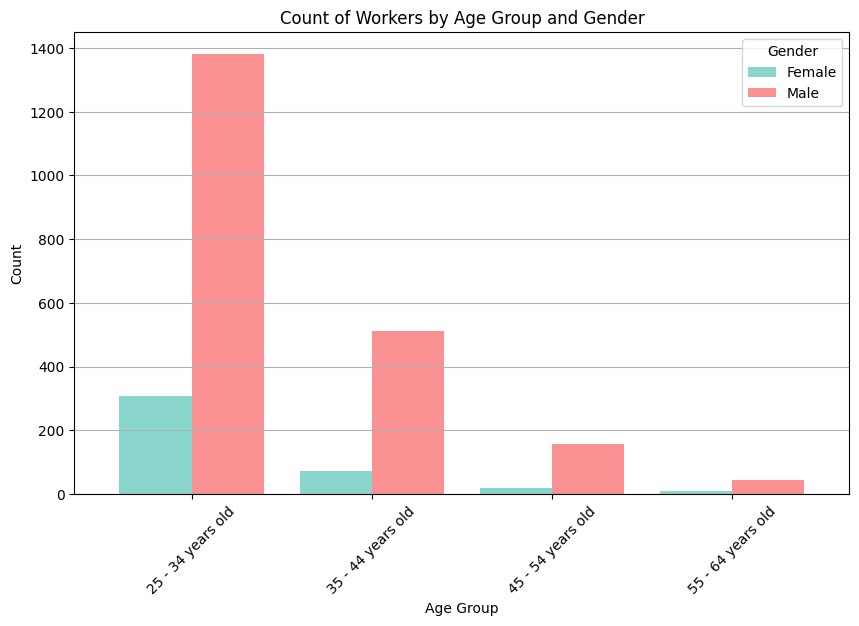

In [16]:
# Group the data by Age Group and Gender, and count occurrences
age_gender_counts = filtered_us_dev_survey_values_df.groupby(['Age', 'Gender'], observed=False).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each gender as a separate bar
age_gender_counts.plot(kind='bar', width=0.8, ax=plt.gca(), color=['#8ad6cc', '#f99192'])

# Customize the plot
plt.title('Count of Workers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y')  # Add horizontal grid lines for better readability

plt.show()

#### Additional Exploratory Data Analyis (EDA) for Data Relevance
- Determine if records where Job Level = New grad have current roles other than "unemployed" to decide if they should be included in analysis.
- Look for records where the Job Level is NaN but the Current Role is not NaN.
    - These records can be used with machine learning classification to populate missing values.

In [17]:
# Review dataset to determine what data is relevant

# Check Current Role for Job Level "New grad"
new_grad_roles = filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['Job Level'] == 'New grad'] \
    .groupby('Current Role').size().reset_index(name='Counts')

# Filter for rows where Job Level is NaN and Current Role is not NaN
nan_job_level_current_role_df = filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['Job Level'].isna() & 
    filtered_us_dev_survey_values_df['Current Role'].notna()]

# Display results
print("Current Roles for Job Level 'New grad':")
display(new_grad_roles)

print("Rows where Job Level is NaN and Current Role is not NaN:")
display(nan_job_level_current_role_df[['Job Level', 'Current Role']])


Current Roles for Job Level 'New grad':


,Current Role,Counts
0,Back-end Developer,8
1,Data Analyst,7
2,Data Engineer,2
3,Data Scientist,9
4,Database Administrator,2
5,Development Operations Engineer,4
6,Front-end Developer,3
7,Full-stack Developer,15
8,Mobile Developer,4
9,Platform Engineer,1


Rows where Job Level is NaN and Current Role is not NaN:


,Job Level,Current Role
84,NaN,Software Engineer
110,NaN,Software Test Engineer
442,NaN,Unemployed
513,NaN,Full-stack Developer
789,NaN,Software Architect
...,...,...
6169,NaN,Data Analyst
6174,NaN,Software Engineer
6175,NaN,Mobile Developer
6202,NaN,Data Analyst


#### More Exploratory Data Analysis (EDA)
- Check if there is a dominant job level associated with the Current Role field that could be used to populate empty fields.

In [18]:
# Group by Current Role and Job Level, and count occurrences
role_level_counts = filtered_us_dev_survey_values_df.groupby(['Current Role', 'Job Level']).size().reset_index(name='Counts')

# Set the option to display all rows for this code cell only
with pd.option_context('display.max_rows', None):
    display(role_level_counts)


,Current Role,Job Level,Counts
0,Back-end Developer,Architect,1
1,Back-end Developer,Director / VP of Engineering,1
2,Back-end Developer,Engineering manager,4
3,Back-end Developer,Founder / CEO / CTO,2
4,Back-end Developer,Freelancer,1
5,Back-end Developer,Level 1 developer (junior),59
6,Back-end Developer,New grad,8
7,Back-end Developer,Principal engineer,13
8,Back-end Developer,Senior developer,123
9,Data Analyst,Engineering manager,1


#### Data Visualization using Seaborn Box Plot
**Purpose:** Demonstrate how gender may impact job levels within specific career roles, in this case, "Development Operations Engineer." This is to support the use of a machine learning approach to populate empty fields. Machine learning can adapt to demographic differences, rather than relying on single-point estimates like the mean or median for classification.

**Insights:**
- **Gender-based Distribution Differences:** 
    - The box plot shows a significant disparity in job level distribution by gender within the "Development Operations Engineer" role. 
    - **Male Distribution:** Males exhibit a broader range of job levels, with a median at the Senior Developer level. This distribution includes representation across higher job levels, such as Principal Engineer and Engineering Manager, suggesting greater advancement opportunities or a wider presence in senior roles for men within this career path. 
    - **Female Distribution:** Females, on the other hand, are primarily clustered at the Level 1 Developer (junior) level, with no representation above the Freelancer level in this role. This limited range could indicate barriers to progression or underrepresentation in senior positions, reflecting broader industry challenges women face in advancing within technical roles.

- **Rationale for Machine Learning Approach:** 
    - Given these clear disparities in job level distribution by gender, a machine learning model like K-Nearest Neighbors (KNN) is well-suited for predicting job levels. KNN can capture complex relationships between demographic features (such as gender) and job levels, providing a more nuanced prediction than simple averages or medians.
    - By considering demographic factors, this approach enables the model to better reflect real-world patterns of representation and career advancement, offering a data-driven perspective on disparities within roles across the dataset.

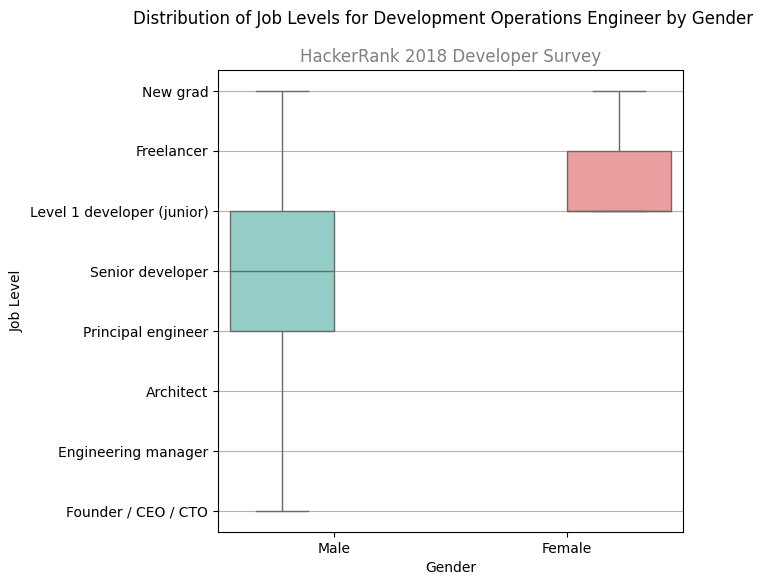

In [19]:
# Define the desired order for job levels from junior to senior based on numeric dataset mapping
job_level_order = [
    "New grad",
    "Freelancer",
    "Level 1 developer (junior)",
    "Senior developer",
    "Principal engineer",
    "Architect",
    "Engineering manager",
    "Founder / CEO / CTO"
]

# Filter for a specific current role 
specific_role = "Development Operations Engineer"
role_data = filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['Current Role'] == specific_role].copy()
role_data['Job Level'] = pd.Categorical(role_data['Job Level'], categories=job_level_order, ordered=True)

# Define a custom palette to match matplotlib graphs
custom_palette = ['#8ad6cc', '#f99192']

# Create a horizontal box plot with gaps between the boxes
plt.figure(figsize=(6, 6))
sns.boxplot(data=role_data, y='Job Level', x='Gender', hue='Gender', palette=custom_palette, width=0.9, dodge=True)
plt.suptitle(f'Distribution of Job Levels for {specific_role} by Gender')
plt.title('HackerRank 2018 Developer Survey', fontsize=12, color='gray')
plt.ylabel('Job Level')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.show()

#### Use Machine Learning to Populate NaN Job Level Records

In [20]:
# Use KNearestNeighbors to determine most likely Job Level based on age, gender, and current role

age_mapping = {
    '25 - 34 years old': 4,
    '35 - 44 years old': 5,
    '45 - 54 years old': 6,
    '55 - 64 years old': 7,
}

gender_mapping = {
    'Male': 1,
    'Female': 2,
}

# Prepare the DataFrame for KNN training
train_df = filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['Job Level'].notna()].copy()

# Create numeric mappings for Age and Gender for training
train_df.loc[:, 'Age Numeric'] = train_df['Age'].map(age_mapping)
train_df.loc[:, 'Gender Numeric'] = train_df['Gender'].map(gender_mapping)

# Encode Current Role using Label Encoding
le_role = LabelEncoder()
train_df.loc[:, 'Current Role Encoded'] = le_role.fit_transform(train_df['Current Role'])

# Prepare the feature set and target variable for training
X_train = train_df[['Age Numeric', 'Gender Numeric', 'Current Role Encoded']]
y_train = train_df['Job Level']

# Filter the rows with NaN Job Level for predictions
predict_df = filtered_us_dev_survey_values_df[filtered_us_dev_survey_values_df['Job Level'].isna()].copy()
predict_df.loc[:, 'Age Numeric'] = predict_df['Age'].map(age_mapping)
predict_df.loc[:, 'Gender Numeric'] = predict_df['Gender'].map(gender_mapping)
predict_df.loc[:, 'Current Role Encoded'] = le_role.transform(predict_df['Current Role'])

# Create the feature set for predictions
X_predict = predict_df[['Age Numeric', 'Gender Numeric', 'Current Role Encoded']]

# Initialize and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict NaN Job Levels
predicted_levels = knn.predict(X_predict)

# Display the predictions before overwriting the original DataFrame
predict_df['Predicted Job Level'] = predicted_levels
print("Predicted Job Levels for records with NaN Job Level:")
display(predict_df[['Age', 'Gender', 'Current Role', 'Predicted Job Level']])

Predicted Job Levels for records with NaN Job Level:


,Age,Gender,Current Role,Predicted Job Level
84,25 - 34 years old,Male,Software Engineer,Level 1 developer (junior)
110,25 - 34 years old,Male,Software Test Engineer,Level 1 developer (junior)
442,55 - 64 years old,Male,Unemployed,Architect
513,25 - 34 years old,Male,Full-stack Developer,Level 1 developer (junior)
789,35 - 44 years old,Male,Software Architect,Engineering manager
...,...,...,...,...
6169,25 - 34 years old,Male,Data Analyst,Level 1 developer (junior)
6174,25 - 34 years old,Male,Software Engineer,Level 1 developer (junior)
6175,55 - 64 years old,Male,Mobile Developer,Senior developer
6202,25 - 34 years old,Female,Data Analyst,Level 1 developer (junior)


In [21]:
#Update Job Level field with predictions and verify changes

# Update the Job Level in the original DataFrame where it was NaN
filtered_us_dev_survey_values_df.loc[filtered_us_dev_survey_values_df['Job Level'].isna(), 'Job Level'] = predicted_levels

# Verify that no records remain with NaN Job Level
remaining_nan_job_levels = filtered_us_dev_survey_values_df['Job Level'].isna().sum()
print(f"Number of records with NaN Job Level after updating: {remaining_nan_job_levels}")

# Display the cleaned DataFrame
display(filtered_us_dev_survey_values_df.head(5))

Number of records with NaN Job Level after updating: 0


,RespondentID,Age,Gender,Industry,Job Level,Current Role,Job Search Priority - Preferred Tech Stack,Job Search Priority - Company Mission,Job Search Priority - Company Culture,Job Search Priority - Work-Life Balance,...,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2
6,6458326054,45 - 54 years old,Male,Financial Services,Director / VP of Engineering,Unemployed,NaN,Company mission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,Prestige of degree,NaN,NaN
40,6479693460,45 - 54 years old,Male,Technology,Founder / CEO / CTO,Software Architect,Preferred tech stack,NaN,Company culture,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,NaN,NaN,Github or personal projects
42,6463550038,25 - 34 years old,Male,Financial Services,Senior developer,Software Engineer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Previous work experience,NaN,NaN,NaN
43,6480657500,25 - 34 years old,Male,Non-Profit,Principal engineer,Software Architect,NaN,NaN,NaN,Good work/life balance,...,Skill Certifications,NaN,NaN,NaN,NaN,NaN,Previous work experience,NaN,NaN,NaN
44,6464279786,35 - 44 years old,Male,Technology,Principal engineer,Back-end Developer,NaN,NaN,NaN,Good work/life balance,...,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!


#### Seaborn Strip Plot: Distribution of Job Levels by Gender within Each Age Group
**Purpose:** Visualize the distribution of job levels across genders within each age group in the technology sector, providing insights into potential patterns of gender representation and career progression at different stages of professional life.

**Insights:**
- **25–34 Age Group:** Men and women are represented at all job levels from New grad to Engineering Manager. However, Founder/CEO/CTO roles are exclusively occupied by men, and multiple data points at this level indicate that this is not an isolated outlier. Additionally, men appear to have continuous representation across all job levels, while higher levels for women, such as Principal Engineer, Architect, and Engineering Manager, display distinct individual points. This suggests lower representation for women in higher roles at this career stage.
- **35–44 Age Group:** Both genders are represented across all job levels, including Founder/CEO/CTO, showing relatively balanced representation in this age range. This distribution may indicate that women who reach this age group achieve a broader range of job levels than in earlier career stages.
- **45–54 Age Group:** There is a noticeable reduction in representation, particularly for women. In this group, women are clustered around Level 1 Developer (junior) and Senior Developer, with only a single outlier at Engineering Manager. Men continue to show representation across more levels, indicating a possible disparity in advancement opportunities as careers progress.
- **55–64 Age Group:** Men are represented across several senior roles, from Senior Developer to Engineering Manager. Women, however, are predominantly clustered at Senior Developer, with sparse representation at Level 1 Developer (junior), Architect, and Engineering Manager. This pattern may reflect limited opportunities for women to progress to higher roles at later career stages.

**Summary:** The visualization highlights potential gender-based differences in career progression. Women in the 25–34 age group appear to be underrepresented in higher roles, with the disparity becoming more pronounced in later career stages (45–54 and 55–64 age groups). This analysis suggests that women in tech may face challenges in advancing to senior positions as they progress in their careers, potentially reflecting systemic barriers to higher-level roles.

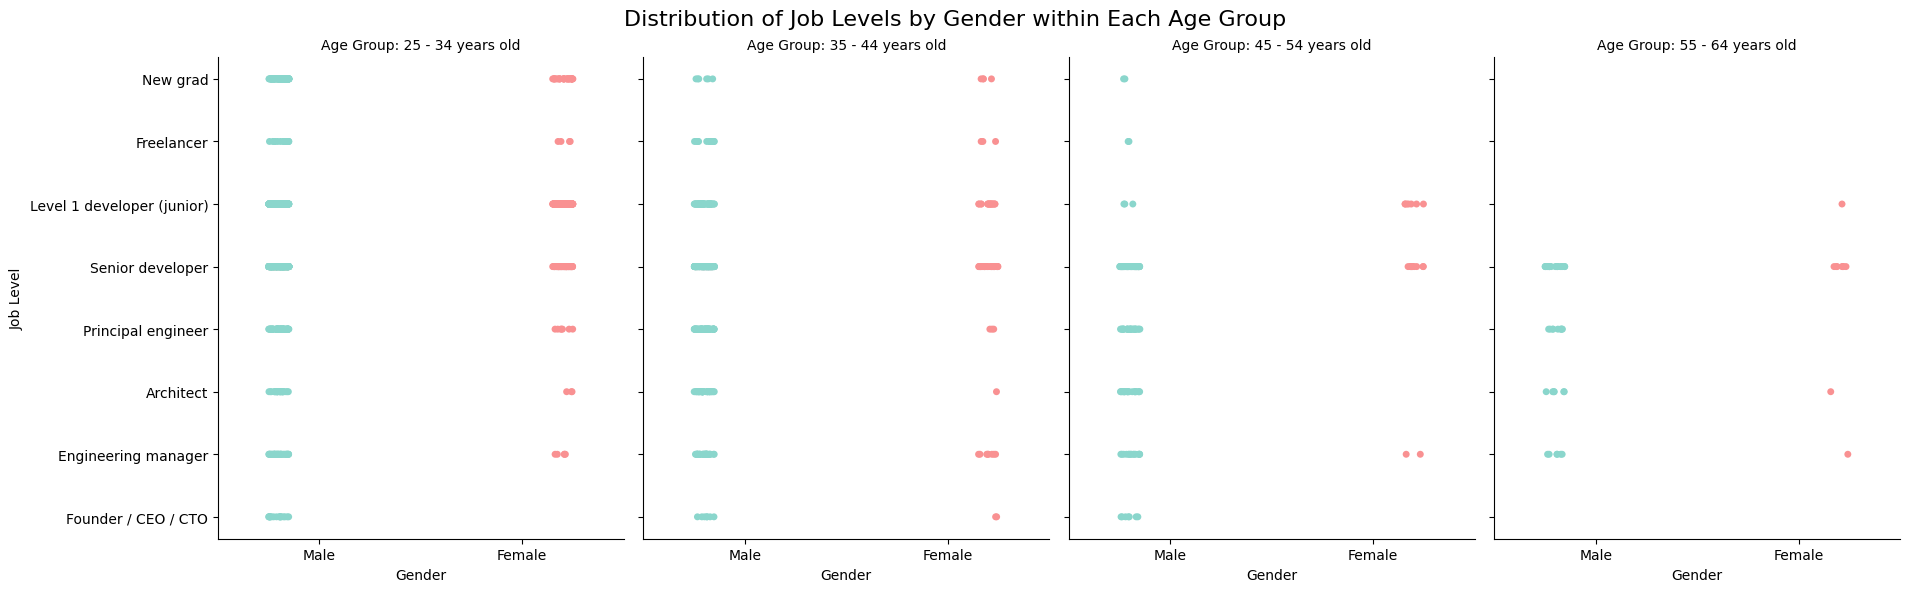

In [22]:
# Define the desired order for job levels and age groups
job_level_order = [
    "Student", "New grad", "Freelancer", "Level 1 developer (junior)", 
    "Senior developer", "Principal engineer", "Architect", 
    "Engineering manager", "Founder / CEO / CTO"
]
age_order = ["25 - 34 years old", "35 - 44 years old", "45 - 54 years old", "55 - 64 years old"]

# Ensure Job Level column is ordered categorically
filtered_us_dev_survey_values_df['Job Level'] = pd.Categorical(
    filtered_us_dev_survey_values_df['Job Level'], categories=job_level_order, ordered=True
)
filtered_us_dev_survey_values_df['Gender'] = pd.Categorical(
    filtered_us_dev_survey_values_df['Gender'], categories=["Male", "Female"], ordered=True
)

# Define a custom palette to match matplotlib graphs
custom_palette = ['#8ad6cc', '#f99192']

# Create the catplot
g = sns.catplot(
    data=filtered_us_dev_survey_values_df,
    x="Gender", y="Job Level", col="Age", hue="Gender", 
    kind="strip", col_order=age_order, hue_order=["Male", "Female"],
    palette=custom_palette, dodge=True, jitter=True, height=6, aspect=0.8
)

# Set title for each plot
g.set_titles("Age Group: {col_name}")

# Overall title for the plot
plt.subplots_adjust(top=0.9)
g.figure.suptitle("Distribution of Job Levels by Gender within Each Age Group", fontsize=16)

plt.show()

#### Import Dataset 2: 2017 Pew Research Center STEM Survey

In [23]:
# import zip file from Pew Research
file_handle, _ = urlretrieve("https://www.pewresearch.org/wp-content/uploads/sites/20/2019/04/2017-Pew-Research-Center-STEM-survey.zip")
zipfile = ZipFile(file_handle, "r")
zipfile.extractall("./data")
zipfile.close()

#### Examine contents of .sav file

In [24]:
file_path = 'data/materials for public release/2017 Pew Research Center STEM survey.sav'

# Read the .sav file into a DataFrame
prc_stem_df, meta = pyreadstat.read_sav(file_path)

# Display basic information about the DataFrame
print(prc_stem_df.info())

# Display the first few rows of the DataFrame
print(prc_stem_df.head())

print(prc_stem_df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Columns: 220 entries, CaseID to RECONC_col
dtypes: float64(220)
memory usage: 8.2 MB
None
   CaseID  weight  WORK_1  WORK_2  WORK_3  WORK_4  EMPLOYED  FULLPART  \
0     3.0  0.0707     1.0     2.0     2.0     2.0       1.0       1.0   
1     4.0  0.3938     1.0     2.0     2.0     2.0       1.0       1.0   
2     5.0  1.7321     2.0     1.0     2.0     2.0       1.0       2.0   
3     6.0  0.1478     1.0     2.0     2.0     1.0       1.0       1.0   
4     7.0  1.5842     2.0     2.0     2.0     1.0       1.0       2.0   

   SELFEMPLOYED  OCCUPATION_col  ...  SCICOUR2_t  MATHCOUR2_t  PPT017_t  \
0           2.0             3.0  ...         1.0          1.0       0.0   
1           2.0             5.0  ...        12.0          8.0       2.0   
2           2.0            19.0  ...        98.0         98.0       0.0   
3           1.0             9.0  ...        15.0          6.0       0.0   
4           1.0       

#### Read the .docx file
- Read the Pew Research Center files associated with the .sav file and convert them into .txt files to understand the codes used.

In [25]:
# Load the Questionnaire document
questionnaire_path = './data/materials for public release/Questionnaire - 2017 Pew Research Center STEM Survey.docx'
questionnaire_doc = Document(questionnaire_path)

# Extract text from the Questionnaire document
prc_questions = []  
for paragraph in questionnaire_doc.paragraphs:
    prc_questions.append(paragraph.text)

# Join all paragraphs into a single string for the questionnaire
prc_questions_text = "\n".join(prc_questions)

# Define the path for saving the questionnaire .txt file
questionnaire_txt_file_path = './data/materials for public release/prc_questionnaire.txt'

# Save the full text to a .txt file
with open(questionnaire_txt_file_path, 'w', encoding='utf-8') as f:
    f.write(prc_questions_text)

print(f"The questionnaire has been extracted and saved to '{questionnaire_txt_file_path}'.")

# Preview the first few lines of the extracted questionnaire
print("Preview of the extracted questionnaire:")
print(prc_questions_text[:400])

# Load the Codebook document
codebook_path = './data/materials for public release/Codebook - 2017 Pew Research Center STEM Survey.docx'
codebook_doc = Document(codebook_path)

# Extract text from the Codebook document
prc_codebook = []  
for paragraph in codebook_doc.paragraphs:
    prc_codebook.append(paragraph.text)

# Join all paragraphs into a single string for the codebook
prc_codebook_text = "\n".join(prc_codebook)

# Define the path for saving the codebook .txt file
codebook_txt_file_path = './data/materials for public release/prc_codebook.txt'

# Save the full text to a .txt file
with open(codebook_txt_file_path, 'w', encoding='utf-8') as f:
    f.write(prc_codebook_text)

print(f"The codebook has been extracted and saved to '{codebook_txt_file_path}'.")

# Preview the first few lines of the extracted codebook
print("Preview of the extracted codebook:")
print(prc_codebook_text[:400])

The questionnaire has been extracted and saved to './data/materials for public release/prc_questionnaire.txt'.
Preview of the extracted questionnaire:
PEW RESEARCH CENTER
2017 STEM QUESTIONNAIRE
JULY 11-AUGUST 10, 2017


ASK ALL:
WORK	Do any of the following currently describe you?  

1. Employed full time (35 hours or more per week) for pay with an organization or company
2. Employed part time (less than 35 hours per week) for pay with an organization or company
3. Self-employed full time (35 hours or more per week)
4. Self-employed part time (
The codebook has been extracted and saved to './data/materials for public release/prc_codebook.txt'.
Preview of the extracted codebook:
BACKGROUND AND CODEBOOK
PEW RESEARCH CENTER
2017 STEM SURVEY

Background
This document provides background information and codebook details for those wishing to analyze the data from a 2017 Pew Research Center survey of U.S. adults about careers and education in science, technology, engineering and math (STEM).

#### Display All Column Names in Dataframe
- Reading the column names with the new context of the Questionnaire and Codebook file will help to determine which columns are needed for analysis

In [26]:
# Display all column names in the DataFrame
print("Column names in the Pew Research dataset:")
for col in prc_stem_df.columns:
    print(col)

Column names in the Pew Research dataset:
CaseID
weight
WORK_1
WORK_2
WORK_3
WORK_4
EMPLOYED
FULLPART
SELFEMPLOYED
OCCUPATION_col
INDUSTRY_col
TEACHSTEM
WORKTYPE_FINAL
SCH2a
SCH2b
SCH3a
SCH3b
SCH3c
SCH3d
SCH4
SCH5a
SCH5b
SCH5c
SCH6a
SCH6b
SCH6c
SCH6d
SCH6e
SCH6f
SCH6g
SCH6h
SCH7
SCH8a
SCH8b
SCH9a
SCH9b
SCH10_flag
SCH10A_1
SCH10A_2
SCH10A_3
SCH10A_4
SCH10A_5
SCH10A_6
SCH10A_Refused
SCH10B_1
SCH10B_2
SCH10B_3
SCH10B_4
SCH10B_5
SCH10B_6
SCH10B_Refused
JOBVALU1_1
JOBVALU1_2
JOBVALU1_3
JOBVALU1_4
JOBVALU1_5
JOBVALU1_6
JOBVALU1_7
JOBVALU1_8
JOBVALU1_Refused
JOBVALU2
AHEADa
AHEADb
AHEADc
AHEADd
AHEADe
AHEADf
AHEADg
TALENT
PROVE
RESPECTA
RESPECTB
FAMSTEM1
FAMSTEM2_1
FAMSTEM2_2
FAMSTEM2_Refused
INTEREST1
STEMJOBa
STEMJOBb
STEMJOBc
STEMJOBd
STEMJOBe
STEMJOBf
STEMJOBg
STEMJOBh
DOV_FORM
REASON1a
REASON1b
REASON1c
REASON1d
REASON1e
REASON1f
REASON1g
REASON2a
REASON2b
REASON2c
REASON2d
REASON2e
REASON2f
REASON2g
TECH1
TECH2
TECH3
TECH4
TECH5
TECH6
GEND1
GEND2
GEND3
GEND4
GEND5
GEND6_a
GEND6_b
GEND6_

#### Convert CaseID from float to int64

In [27]:
# Convert 'CaseID' to int64
prc_stem_df['CaseID'] = prc_stem_df['CaseID'].astype('int64')

# Confirm the change
print("\nData types after conversion:")
print(prc_stem_df.dtypes)


Data types after conversion:
CaseID          int64
weight        float64
WORK_1        float64
WORK_2        float64
WORK_3        float64
               ...   
EDUC4CAT      float64
RACE_col      float64
RECONA_col    float64
RECONB_col    float64
RECONC_col    float64
Length: 220, dtype: object


#### Exploratory Data Analysis (EDA)
- Search for null values or refused responses in fields required for analysis.

In [28]:
# Summary of counts for each value in WORK_1
employed_full_time = prc_stem_df['WORK_1'].value_counts(dropna=False)
print("Summary of counts for each value in WORK_1:")
print(employed_full_time)

# Summary of counts for each value in WORK_2
employed_part_time = prc_stem_df['WORK_2'].value_counts(dropna=False)
print("\nSummary of counts for each value in WORK_2:")
print(employed_part_time)

# Summary of counts for each value in WORK_3
self_employed_full_time = prc_stem_df['WORK_3'].value_counts(dropna=False)
print("\nSummary of counts for each value in WORK_3:")
print(self_employed_full_time)

# Summary of counts for each value in WORK_4
self_employed_part_time = prc_stem_df['WORK_4'].value_counts(dropna=False)
print("\nSummary of counts for each value in WORK_4:")
print(self_employed_part_time)

# Summary of counts for each value in EMPLOYED
employment_status = prc_stem_df['EMPLOYED'].value_counts(dropna=False)
print("\nSummary of counts for each value in EMPLOYED:")
print(employment_status)

# Summary of counts for each value in FULLPART
employment_full_part = prc_stem_df['FULLPART'].value_counts(dropna=False)
print("\nSummary of counts for each value in FULLPART:")
print(employment_full_part)

# Summary of counts for each value in SELFEMPLOYED
self_employment = prc_stem_df['SELFEMPLOYED'].value_counts(dropna=False)
print("\nSummary of counts for each value in SELFEMPLOYED:")
print(self_employment)

# Summary of counts for each value in ppagecat
prc_age = prc_stem_df['ppagecat'].value_counts(dropna=False)
print("\nSummary of counts for each value in ppagecat:")
print(prc_age)

# Summary of counts for each value in PPGENDER
prc_gender = prc_stem_df['PPGENDER'].value_counts(dropna=False)
print("\nSummary of counts for each value in PPGENDER:")
print(prc_gender)

# Summary of counts for each value in PPGENDER
prc_stem_degree = prc_stem_df['STEM_DEGREE'].value_counts(dropna=False)
print("\nSummary of counts for each value in STEM_DEGREE:")
print(prc_stem_degree)

Summary of counts for each value in WORK_1:
WORK_1
1.0    3504
2.0    1407
9.0       3
Name: count, dtype: int64

Summary of counts for each value in WORK_2:
WORK_2
2.0    3984
1.0     915
9.0      15
Name: count, dtype: int64

Summary of counts for each value in WORK_3:
WORK_3
2.0    4591
1.0     313
9.0      10
Name: count, dtype: int64

Summary of counts for each value in WORK_4:
WORK_4
2.0    4432
1.0     473
9.0       9
Name: count, dtype: int64

Summary of counts for each value in EMPLOYED:
EMPLOYED
1.0    4702
2.0     212
Name: count, dtype: int64

Summary of counts for each value in FULLPART:
FULLPART
1.0    3743
2.0     958
3.0     212
9.0       1
Name: count, dtype: int64

Summary of counts for each value in SELFEMPLOYED:
SELFEMPLOYED
2.0    3937
1.0     756
3.0     212
9.0       9
Name: count, dtype: int64

Summary of counts for each value in ppagecat:
ppagecat
5.0    1285
4.0    1079
2.0     905
3.0     900
6.0     461
1.0     187
7.0      97
Name: count, dtype: int64

Summ

In [29]:
# Convert specified columns to int64
columns_to_convert = [
    'WORK_1', 'WORK_2', 'WORK_3', 'WORK_4', 
    'EMPLOYED', 'FULLPART', 'SELFEMPLOYED'
]

# Convert to int64
for column in columns_to_convert:
    prc_stem_df[column] = prc_stem_df[column].astype('int64')

# Drop records with 9 for WORK_1, WORK_2, WORK_3, WORK_4, EMPLOYED, FULLPART, SELFEMPLOYED
prc_stem_df = prc_stem_df[~prc_stem_df[columns_to_convert].isin([9]).any(axis=1)]

# For ppagecat, drop 1, 6, and 7
prc_stem_df = prc_stem_df[~prc_stem_df['ppagecat'].isin([1, 6, 7])]

# Confirming the changes
print(f"Remaining records after filtering: {prc_stem_df.shape[0]}")
print("\nUpdated DataFrame info:")
print(prc_stem_df.info())


Remaining records after filtering: 4155

Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 4155 entries, 0 to 4913
Columns: 220 entries, CaseID to RECONC_col
dtypes: float64(212), int64(8)
memory usage: 7.0 MB
None


#### Refine DataFrame for Pew Research Center STEM Survey
- Eliminate fields not needed for hypothesis
- Rename columns to more meaningful names

In [30]:
# List of columns to exclude
columns_to_exclude = [
    'SCH2a', 'SCH2b', 'SCH3a', 'SCH3b', 'SCH3c', 'SCH3d',
    'SCH4', 'SCH5a', 'SCH5b', 'SCH5c', 'SCH6a', 'SCH6b',
    'SCH6c', 'SCH6d', 'SCH6e', 'SCH6f', 'SCH6g', 'SCH6h',
    'SCH7', 'SCH8a', 'SCH8b', 'SCH9a', 'SCH9b', 'SCH10_flag',
    'SCH10A_1', 'SCH10A_2', 'SCH10A_3', 'SCH10A_4', 'SCH10A_5',
    'SCH10A_6', 'SCH10A_Refused', 'SCH10B_1', 'SCH10B_2',
    'SCH10B_3', 'SCH10B_4', 'SCH10B_5', 'SCH10B_6', 'SCH10B_Refused',
    'STEMJOBa', 'STEMJOBb', 'STEMJOBc', 'STEMJOBd', 'STEMJOBe',
    'STEMJOBf', 'STEMJOBg', 'STEMJOBh', 'REASON2a', 'REASON2b',
    'REASON2c', 'REASON2d', 'REASON2e', 'REASON2f', 'REASON2g',
    'ETHNJOB2', 'ETHNJOB2_OE1_col', 'ETHNJOB2_OE2_col', 
    'ETHNJOB2_OE3_col', 'RACE_col', 'SCICOUR2_t',
    'MATHCOUR2_t', 'PPT017_t', 'PPT18OV_t', 'PPHHSIZE_t', 
    'ETHN1', 'ETHN2a', 'ETHN2b', 'ETHN2c', 'ETHN2d', 
    'ETHN3a', 'ETHN3b', 'ETHN3c', 'ETHN3d', 'ETHN4', 
    'ETHN5', 'ETHN6_a', 'ETHN6_b', 'ETHN6_c', 'ETHN6_d',
    'ETHN6_Refused', 'ETHNDISC_a', 'ETHNDISC_b', 'ETHNDISC_c',
    'ETHNDISC_d', 'ETHNDISC_e', 'ETHNDISC_f', 'ETHNDISC_g',
    'ETHNDISC_h', 'ETHNDISC_i', 'ETHNDISC_Refused', 'FAMSTEM1',
    'FAMSTEM2_1', 'FAMSTEM2_2', 'FAMSTEM2_Refused', 'INTEREST1',
    'TECH4', 'TECH5', 'TECH6', 'ETHNJOB1', 'PARTY', 'PARTYLN',
    'IDEO', 'PUBLIC', 'DOV_FORM', 'PPHHHEAD', 'HH_INCOME_col',
    'PPMARIT', 'PPMSACAT', 'SCH1_OE1_col', 'SCH1_OE2_col',
    'SCH1_OE3_col', 'SCH7_OE1_col', 'INTEREST2_OE', 'INTEREST3_OE1_col',
    'INTEREST3_OE2_col', 'INTEREST3_OE3_col', 'XSPANISH', 'Xparent',
    'PPETHM', 'FIRSTCOLL', 'SCICOUR1', 'MATHCOUR1'
]

# Create a new DataFrame excluding the specified columns
pew_research_numeric = prc_stem_df.loc[:, ~prc_stem_df.columns.isin(columns_to_exclude)].copy()

# Create a dictionary for renaming specified columns
columns_to_rename = {
    'WORK_1': 'Employed Full-Time by Company',
    'WORK_2': 'Employed Part-Time by Company',
    'WORK_3': 'Self-Employed Full-Time',
    'WORK_4': 'Self-Employed Part-Time',
    'EMPLOYED': 'Employment Status',
    'FULLPART': 'Employee Type',
    'SELFEMPLOYED': 'Self-Employment Status',
    'OCCUPATION_col': 'Occupation',
    'INDUSTRY_col': 'Industry',
    'TEACHSTEM': 'STEM Teacher Y/N',
    'WORKTYPE_FINAL': 'STEM Worker Y/N',
    'EDUC4CAT': 'Education Level Categorical',
    'RECONA_col': 'Computer Work Y/N',
    'RECONB_col': 'Engineer Y/N',
    'RECONC_col': 'Science Worker Type',
    'STEM_DEGREE': 'STEM Degree Y/N',
    'JOBVALU1_1': 'Job Choice - High Pay',
    'JOBVALU1_2': 'Job Choice - Work-Life Balance',
    'JOBVALU1_3': 'Job Choice - Advancement Opportunities',
    'JOBVALU1_4': 'Job Choice - Contribution to Society',
    'JOBVALU1_5': 'Job Choice - Respect of Others',
    'JOBVALU1_6': 'Job Choice - Helping Others',
    'JOBVALU1_7': 'Job Choice - Welcoming Environment',
    'JOBVALU1_8': 'Job Choice - None of the Above',
    'JOBVALU2': 'Job Choice - Most Important',
    'AHEADa': 'Employment Advancement - Assertiveness',
    'AHEADb': 'Employment Advancement - Socializing with Co-Workers',
    'AHEADc': 'Employment Advancement - Point Out Workplace Problems',
    'AHEADd': 'Employment Advancement - Workplace Mentor',
    'AHEADe': 'Employment Advancement - Sharing Personal Life',
    'AHEADf': 'Employment Advancement - Working Harder',
    'AHEADg': 'Employment Advancement - Point Out Personal Accomplishments',
    'TALENT': 'Employment Advancement - Natural Ability',
    'PROVE': 'Workplace Respect - Need to Prove Oneself',
    'RESPECTA': 'Workplace Respect - Valued by Supervisor',
    'RESPECTB': 'Workplace Respect - Valued by Co-Workers',
    'JOBVALU1_Refused': 'Job Choice - Refused to Answer',
    'REASON1a': 'Gender Exclusion - Lack of Early Encouragement',
    'REASON1b': 'Gender Exclusion - Lack of Belief in Success',
    'REASON1c': 'Gender Exclusion - Lack of Female Role Models',
    'REASON1d': 'Gender Exclusion - Discrimination in Recruitment Hiring and Promotion',
    'REASON1e': 'Gender Exclusion - Slow Increase in Female Representation',
    'REASON1f': 'Gender Exclusion - Lower Interest in STEM',
    'REASON1g': 'Gender Exclusion - Work-Family Balance Challenges',
    'TECH1': 'Descrimination Perception - Awareness',
    'TECH2': 'Descrimination Perception - Industry Specific',
    'TECH3': 'Descrimination Perception - Problem Severity',
    'GEND1': 'Respondent Workplace - Gender Balance',
    'GEND2': 'Respondent Workplace - Recruitment and Hiring',
    'GEND3': 'Respondent Workplace - Advancement Opportunities',
    'GEND4': 'Respondent Workplace - Gender Diversity Initiatives',
    'GEND5': 'Respondent Workplace - Gender Diversity Importance',
    'GEND6_a': 'Gender Diversity Reason - Equal Opportunity',
    'GEND6_b': 'Gender Diversity Reason - Contributes to Success',
    'GEND6_c': 'Gender Diversity Reason - Expands Workforce Supply',
    'GEND6_d': 'Gender Diversity Reason - None of the Above',
    'GEND6_Refused': 'Gender Diversity Reason - Refused to Answer',
    'GENDJOB1': 'Gender Effect on Job Success',
    'GENDDISC_a': 'Personal Experience - Denied Promotion',
    'GENDDISC_b': 'Personal Experience - Earned Less than Opposite Gender Counterpart',
    'GENDDISC_c': 'Personal Experience - Denied Job',
    'GENDDISC_d': 'Personal Experience - Felt Isolated',
    'GENDDISC_e': 'Personal Experience - Received Less Senior Support than Opposite Gender Counterpart', 
    'GENDDISC_f': 'Personal Experience - Treated as Incompetent',
    'GENDDISC_g': 'Personal Experience - Denied Important Assignments',
    'GENDDISC_h': 'Personal Experience - Microaggressions',
    'GENDDISC_i': 'Personal Experience - None of These',
    'GENDDISC_Refused': 'Personal Experience - Refused to Answer',
    'PPCM1301_col': 'Employer Type',
    'PPGENDER': 'Gender',
    'PPREG4': 'US Region',
    'ppagecat': 'Age',
    'ppagect4': 'Broad Age Range',
    'DEGREE1_computer': 'College Major - Computer and Information Sciences', 
    'DEGREE1_math': 'College Major - Mathematics and Statistics',
    'DEGREE1_life': 'College Major - Life Sciences or Agriculture',
    'DEGREE1_physical': 'College Major - Physical or Earth Sciences',
    'DEGREE1_engineering': 'College Major - Engineering or Architecture',
    'DEGREE1_health': 'College Major - Health-Related',
    'DEGREE1_otherstem': 'College Major - Other STEM-related Degree',
    'DEGREE1_othernonstem': 'College Major - Non-STEM Degree',
    'DEGREE2_computer': 'Graduate Degree - Computer and Information Sciences',
    'DEGREE2_math': 'Graduate Degree - Mathematics and Statistics',
    'DEGREE2_life': 'Graduate Degree - Life Sciences or Agriculture',
    'DEGREE2_physical': 'Graduate Degree - Physical or Earth Sciences',
    'DEGREE2_engineering': 'Graduate Degree - Engineering or Architecture',
    'DEGREE2_health': 'Graduate Degree - Health-Related',
    'DEGREE2_otherstem': 'Graduate Degree - Other STEM-related Degree',
    'DEGREE2_othernonstem': 'Graduate Degree - Non-STEM Degree',
    'HARASS1': 'Harassment - Personal Workplace Awareness',
    'HARASS2': 'Harassment - Industry Awareness',
    'HARASS3': 'Harassment - Personal Experience',
    'VOTECH': 'Background - Vocational or Technical Training',
    'RELATE1': 'Job Related to College Major Y/N',
    'RELATE2': 'Use of College Major Skills Y/N',
    'PPCM0166': 'Company Size',
    'GENDJOB2_OE1_col': 'Gender Impact - Barrier to Success (First Mention)',
    'GENDJOB2_OE2_col': 'Gender Impact - Barrier to Success (Second Mention)',
    'GENDJOB2_OE3_col': 'Gender Impact - Barrier to Success (Third Mention)'
}

# Rename the columns as specified
pew_research_numeric.rename(columns=columns_to_rename, inplace=True)


# Display the new DataFrame info to confirm changes
print("\nUpdated DataFrame info:")
print(pew_research_numeric.info())

print("Column names in the Pew Research Numeric dataset:")
for col in pew_research_numeric.columns:
    print(col)


Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 4155 entries, 0 to 4913
Columns: 101 entries, CaseID to Science Worker Type
dtypes: float64(93), int64(8)
memory usage: 3.2 MB
None
Column names in the Pew Research Numeric dataset:
CaseID
weight
Employed Full-Time by Company
Employed Part-Time by Company
Self-Employed Full-Time
Self-Employed Part-Time
Employment Status
Employee Type
Self-Employment Status
Occupation
Industry
STEM Teacher Y/N
STEM Worker Y/N
Job Choice - High Pay
Job Choice - Work-Life Balance
Job Choice - Advancement Opportunities
Job Choice - Contribution to Society
Job Choice - Respect of Others
Job Choice - Helping Others
Job Choice - Welcoming Environment
Job Choice - None of the Above
Job Choice - Refused to Answer
Job Choice - Most Important
Employment Advancement - Assertiveness
Employment Advancement - Socializing with Co-Workers
Employment Advancement - Point Out Workplace Problems
Employment Advancement - Workplace Mentor
Employment Advanc

**Exploratory Data Analyis on Pew Research Center dataframe**
- Check for employees who marked that they are self-employed and also employed by a company
    - Respondents who are only self-employed are not useful to my hypothesis so they can be filtered out from the dataset


In [31]:
# Count of respondents who are both self-employed part-time and employed by a company
self_employed_and_company_employed_count = pew_research_numeric[
    (pew_research_numeric['Self-Employed Part-Time'] == 1) &
    ((pew_research_numeric['Employed Full-Time by Company'] == 1) |
     (pew_research_numeric['Employed Part-Time by Company'] == 1))
].shape[0]

# Count of respondents who are self-employed part-time and not employed by a company
self_employed_full_time_only_count = pew_research_numeric[
    (pew_research_numeric['Self-Employed Part-Time'] == 1) &
    ((pew_research_numeric['Employed Full-Time by Company'].isin([2, 9])) &
     (pew_research_numeric['Employed Part-Time by Company'].isin([2, 9])))
].shape[0]

print("Count of respondents who are both self-employed part-time and employed by a company:", self_employed_and_company_employed_count)
print("Count of respondents who are self-employed part-time and not employed by a company:", self_employed_full_time_only_count)

Count of respondents who are both self-employed part-time and employed by a company: 201
Count of respondents who are self-employed part-time and not employed by a company: 148


In [32]:
# Count of respondents who are both self-employed full-time and employed by a company
self_employed_and_company_employed_count = pew_research_numeric[
    (pew_research_numeric['Self-Employed Full-Time'] == 1) &
    ((pew_research_numeric['Employed Full-Time by Company'] == 1) |
     (pew_research_numeric['Employed Part-Time by Company'] == 1))
].shape[0]

# Count of respondents who are self-employed full-time and not employed by a company
self_employed_full_time_only_count = pew_research_numeric[
    (pew_research_numeric['Self-Employed Full-Time'] == 1) &
    ((pew_research_numeric['Employed Full-Time by Company'].isin([2, 9])) &
     (pew_research_numeric['Employed Part-Time by Company'].isin([2, 9])))
].shape[0]

print("Count of respondents who are both self-employed full-time and employed by a company:", self_employed_and_company_employed_count)
print("Count of respondents who are self-employed full-time and not employed by a company:", self_employed_full_time_only_count)

Count of respondents who are both self-employed full-time and employed by a company: 78
Count of respondents who are self-employed full-time and not employed by a company: 165


In [33]:
# Filter to retain only records where the respondent is employed by a company, has Employment Status = 1, and is a STEM Worker
pew_research_stem_employed_filtered = pew_research_numeric[
    ((pew_research_numeric['Employed Full-Time by Company'] == 1) |
     (pew_research_numeric['Employed Part-Time by Company'] == 1)) &
    (pew_research_numeric['Employment Status'] == 1) &
    (pew_research_numeric['STEM Worker Y/N'] == 1)
]

# Display the count of remaining records after filtering
remaining_stem_employed_count = pew_research_stem_employed_filtered.shape[0]
remaining_stem_employed_count

1974

**Find values for "Job Choice" columns**
- The Job Choice columns were coded with numbers in the original survey as a single column. I need to know if the split columns have 0 and 1 or 1 and 2 as Yes/No representation to create visualizations.

In [34]:
# List of job choice columns to check value counts
job_choice_columns = [
    'Job Choice - High Pay',
    'Job Choice - Work-Life Balance',
    'Job Choice - Advancement Opportunities',
    'Job Choice - Contribution to Society',
    'Job Choice - Respect of Others',
    'Job Choice - Helping Others',
    'Job Choice - Welcoming Environment',
]

# Display value counts for each column in the job choice list
for column in job_choice_columns:
    print(f"Value counts for '{column}':")
    print(pew_research_stem_employed_filtered[column].value_counts(dropna=False))
    print("\n")

Value counts for 'Job Choice - High Pay':
Job Choice - High Pay
0.0    997
1.0    977
Name: count, dtype: int64


Value counts for 'Job Choice - Work-Life Balance':
Job Choice - Work-Life Balance
1.0    1477
0.0     497
Name: count, dtype: int64


Value counts for 'Job Choice - Advancement Opportunities':
Job Choice - Advancement Opportunities
0.0    1011
1.0     963
Name: count, dtype: int64


Value counts for 'Job Choice - Contribution to Society':
Job Choice - Contribution to Society
1.0    1095
0.0     879
Name: count, dtype: int64


Value counts for 'Job Choice - Respect of Others':
Job Choice - Respect of Others
0.0    1045
1.0     929
Name: count, dtype: int64


Value counts for 'Job Choice - Helping Others':
Job Choice - Helping Others
0.0    1073
1.0     901
Name: count, dtype: int64


Value counts for 'Job Choice - Welcoming Environment':
Job Choice - Welcoming Environment
1.0    1029
0.0     945
Name: count, dtype: int64




#### Matplotlib Stacked Bar Chart: Job Choice Priorities by Gender (Normalized)
**Purpose:** Recreate the HackerRank survey analysis with Pew Research Center data to validate findings on job choice priorities by gender in the technology and STEM fields. This chart has been both weighted and normalized to reflect the gender imbalance in respondents and the demographic adjustments applied in the Pew Research Center dataset.

**Insights:**
- **Work-Life Balance as Top Priority:** Both women (76.6%) and men (72.5%) consider *Work-Life Balance* crucial when choosing a job, consistent with the HackerRank survey. This emphasizes the importance of flexible work environments in addressing the demands of professional and personal life balance for both genders.
- **Higher Emphasis on Helping Others and Contribution to Society by Women:** Women in the Pew Research Center data place significantly more value on *Helping Others* (57.9% for women vs. 28.5% for men) and *Contribution to Society* (60.4% for women vs. 49.5% for men). In contrast, the HackerRank survey reported lower ratings for *Company Mission* and *Product Impact* for both genders, suggesting that while women in the Pew sample prioritize purpose-driven work, this emphasis was not as pronounced in the HackerRank survey. This could reflect differing values or motivations across these two groups of respondents.
- **Company Culture as a Key Factor:** *Company Culture* remains a higher priority for women (53.2%) compared to men (48.3%)in the Pew Research Center data, echoing findings from the HackerRank survey (44.2% for women vs. 39.0% for men). This preference underlines the importance of inclusive, supportive work environments for women in STEM fields.
- **Compensation as a Higher Priority for Men:** *Compensation* is more highly prioritized by men than women in both surveys, with Pew Research Center data showing 60.3% for men vs. 47.6% for women, and HackerRank showing 56.9% for men vs. 41.2% for women. This consistent trend suggests that, although compensation is important, it may not be the foremost factor for women in STEM.
- **Contrasting Trends in Professional Growth Priorities:** The *Professional Growth* findings between the two surveys reveal nearly opposite trends. In the HackerRank survey, women rated *Professional Growth and Learning* higher than men (54.6% for women vs. 44.9% for men). However, in the Pew Research Center data, men prioritized *Professional Growth* more (57.5% for men vs. 46.3% for women). This discrepancy may indicate varied career motivations between the samples, with HackerRank respondents possibly focusing more on career advancement opportunities for women than their counterparts in the Pew Research Center survey.

**Methodology Consideration:** It is important to note a key difference in methodology: the HackerRank survey required respondents to select exactly three job priorities, whereas the Pew Research Center survey allowed respondents to choose any number of priorities or none at all. This flexibility in the Pew Research Center survey may have influenced the distribution of choices, allowing for a broader expression of priorities compared to the forced-choice format of the HackerRank survey. Additionally, the Pew data incorporates a weighting factor to adjust for demographic representation, adding rigor to the analysis but potentially influencing comparisons with the HackerRank data.

**Summary:** This analysis of the Pew Research Center data generally supports the trends observed in the HackerRank survey, particularly around work-life balance and company culture. However, the contrasting findings for professional growth and the emphasis on helping others and societal contribution underscore that motivations can vary widely across STEM fields. These insights emphasize the importance of creating flexible, purpose-driven, and growth-oriented workplaces to effectively retain a diverse workforce in technology and STEM.

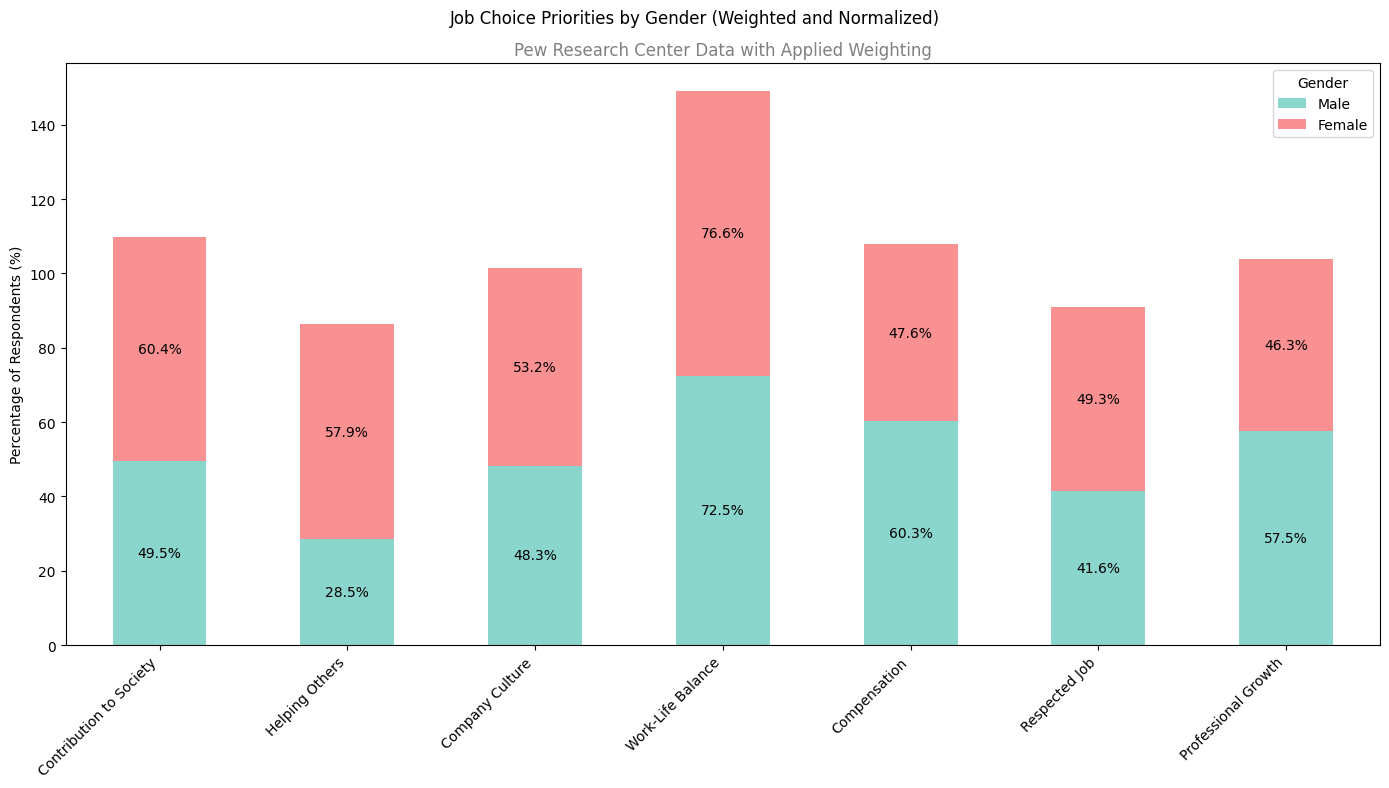

In [35]:
# Define a dictionary mapping the Pew Research column names to display names
column_display_names_pew = {
    'Job Choice - Contribution to Society': 'Contribution to Society',
    'Job Choice - Helping Others': 'Helping Others',
    'Job Choice - Welcoming Environment': 'Company Culture',
    'Job Choice - Work-Life Balance': 'Work-Life Balance',
    'Job Choice - High Pay': 'Compensation',
    'Job Choice - Respect of Others': 'Respected Job',
    'Job Choice - Advancement Opportunities': 'Professional Growth'
}

# Select only the job choice columns to analyze
job_choice_columns = list(column_display_names_pew.keys())

# Multiply each job choice column by the weight column to apply weighting
weighted_data = pew_research_stem_employed_filtered.copy()
for col in job_choice_columns:
    weighted_data[col] = weighted_data[col] * weighted_data['weight']

# Group data by gender and sum up the weighted counts for each job choice criterion
weighted_criteria_counts_pew = weighted_data.groupby('Gender')[job_choice_columns].sum()

# Calculate the total weighted count by gender to normalize the data
total_weighted_counts_by_gender_pew = weighted_data.groupby('Gender')['weight'].sum()

# Normalize the data by calculating the percentage of each job criterion per gender
criteria_percentages_pew_weighted = weighted_criteria_counts_pew.div(total_weighted_counts_by_gender_pew, axis=0) * 100

# Rename gender values for readability
criteria_percentages_pew_weighted.index = criteria_percentages_pew_weighted.index.map({1: 'Male', 2: 'Female'})

# Rename columns in the DataFrame for plotting
criteria_percentages_pew_weighted = criteria_percentages_pew_weighted.rename(columns=column_display_names_pew)

# Plotting the weighted normalized stacked bar chart
ax = criteria_percentages_pew_weighted.T.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#8ad6cc', '#f99192'])
plt.suptitle('Job Choice Priorities by Gender (Weighted and Normalized)')
plt.title('Pew Research Center Data with Applied Weighting', fontsize=12, color='gray')
plt.ylabel('Percentage of Respondents (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding percentage labels to each section of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

## Data after this point is still in the process of being analyzed, cleaned, and transformed.
- Due to time constraints for the submission of Checkpoint 2, the work on these datasets is not complete. However, they will continue to be worked with for the final project.
- The work prior to this point should include all requirements for Checkpoint 2: Exploratory Data Analysis & Visualization aside from one of the visualizations, which is included after Dataset 4 was imported and partially processed.

#### Import Dataset 3: National Center for Science and Engineering Statistics (NCSES)
- Includes demographic breakdown of STEM participation in the workforce from 1993 - 2019
- Data was compiled by the NCSES from the U.S. Census Bureau, American Community Survey, National Center for Science and Engineering Statistics, and more
- For the full list of compiled sources: https://ncses.nsf.gov/pubs/nsb20212/data#source-block 

In [36]:
# scrape HTML file to extract tables
os.makedirs("data/ncses", exist_ok=True) # create new subfolder for tables scraped from website

url = "https://ncses.nsf.gov/pubs/nsb20212/participation-of-demographic-groups-in-stem"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser") # parse the html as a string

tables = soup.find_all("table")


# loop through each table to extract the title and data
for i in range(len(tables)):
    table = tables[i]

    # Extract the table's title attribute and clean it up for a filename
    title = table.get('title')  # Find the title attribute in the table

    if title:
        title = title.strip()  # Use the title if it exists
    else:
        title = f'table_{i}'  # Generic name if the table does not have a title
    
    # Clean title: replace spaces with hyphens and remove special characters except apostrophes
    title = title.replace("'", "")  # Remove apostrophes
    title = re.sub(r"[^\w\s]", "-", title)  # Replace special characters with hyphens
    title = title.replace(" ", "-")  # Replace spaces with hyphens

    # Truncate the title if it exceeds 50 characters for filename compatibility
    if len(title) > 50:
        title = title[:50]

    file_name = f"data/ncses/{title}.csv" # generate an empty csv for each table

    # convert each table to a pandas df
    df = pd.read_html(str(table))[0]

    # save the pandas df as a csv
    df.to_csv(file_name, index=False)

C:\Users\Michelle\AppData\Local\Temp\ipykernel_42932\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Michelle\AppData\Local\Temp\ipykernel_42932\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Michelle\AppData\Local\Temp\ipykernel_42932\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\Michelle\AppData\Local\Temp\ipykernel_42932\2148890883.py:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version

**Import Additional Resources From National Center for Science and Engineering Statistics (NCSES)**
- The Report titled *"The STEM Labor Force of Today: Scientists, Engineers, and Skilled Technical Workers"* spans several pages and has supplemental tables that are not included on any of the pages. 

In [37]:
# import data-tables zip file from NCSES
file_handle, _ = urlretrieve("https://ncses.nsf.gov/pubs/nsb20212/assets/nsb20212-report-tables-excels.zip")
zipfile = ZipFile(file_handle, "r")
zipfile.extractall("./data/ncses")
zipfile.close()

# import data-figures zip file from NCSES
file_handle, _ = urlretrieve("https://ncses.nsf.gov/pubs/nsb20212/assets/nsb20212-report-figures-excels.zip")
zipfile = ZipFile(file_handle, "r")
zipfile.extractall("./data/ncses")
zipfile.close()

# import supplemental tables zip file from NCSES
file_handle, _ = urlretrieve("https://ncses.nsf.gov/pubs/nsb20212/assets/supplemental-tables/nsb20212-supplemental-tables-figures-tables-excels.zip")
zipfile = ZipFile(file_handle, "r")
zipfile.extractall("./data/ncses")
zipfile.close()

**Convert relevant xlsx files into pandas dataframes**

In [38]:
# Define the path to the file: Table LBR-7 - Women with a bachelor's degree or above, by broad occupational group and highest degree: 1993, 2003, 2019
file_path = './data/ncses/nsb20212-tablbr-007.xlsx'

# Define start rows for each section based on the Excel file structure
start_row_degrees = 9  # Adjust based on where Degree Focus data starts
start_row_occupations = 6  # Adjust based on where Occupational Group data starts
num_rows_degrees = 2  # Number of rows for the degree section
num_rows_occupations = 2  # Number of rows for the occupation section

# Load the Degree Focus data
degree_focus_df = pd.read_excel(
    file_path,
    skiprows=start_row_degrees,
    nrows=num_rows_degrees,
    names=["Category", "1993 - Count", "2003 - Count", "2019 - Count", "1993 - Percent", "2003 - Percent", "2019 - Percent"]
)

# Load the Occupational Group data
occupational_group_df = pd.read_excel(
    file_path,
    skiprows=start_row_occupations,
    nrows=num_rows_occupations,
    names=["Category", "1993 - Count", "2003 - Count", "2019 - Count", "1993 - Percent", "2003 - Percent", "2019 - Percent"]
)

# Add a column to indicate whether the data is for degrees or occupations
degree_focus_df['Type'] = 'Degree'
occupational_group_df['Type'] = 'Occupation'

# Convert "Thousands" columns to actual numbers by multiplying by 1,000
for col in ["1993 - Count", "2003 - Count", "2019 - Count"]:
    degree_focus_df[col] = degree_focus_df[col] * 1000
    occupational_group_df[col] = occupational_group_df[col] * 1000

# Concatenate both DataFrames to have one unified DataFrame for comparison
ncses_women_science_and_engineering_ed_vs_employment_df = pd.concat([degree_focus_df, occupational_group_df], ignore_index=True)

# Display the resulting DataFrame
print("Combined DataFrame for Degrees and Occupations:")
display(ncses_women_science_and_engineering_ed_vs_employment_df)

Combined DataFrame for Degrees and Occupations:


c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Category,1993 - Count,2003 - Count,2019 - Count,1993 - Percent,2003 - Percent,2019 - Percent,Type
0,S&E,2025000.0,3426000,6132000,31.0,36,40,Degree
1,S&E-related,NaN,2462000,4747000,NaN,56,64,Degree
2,S&E,755000.0,1269000,2193000,23.0,26,29,Occupation
3,S&E-related,NaN,2948000,5109000,NaN,55,57,Occupation


In [39]:
# Define the path to the file: Figure LBR-21 - Women with a bachelor's degree or higher in S&E and S&E-related occupations: Selected years, 1993–2019
file_path = './data/ncses/nsb20212-figlbr-021.xlsx'

# Load the data, skipping rows based on the Excel file structure
start_row = 3  

# Load the data with descriptive column names
women_s_e_degree_trends_df = pd.read_excel(
    file_path,
    skiprows=start_row,
    names=[
        "Year", "Computer and Mathematical Scientists (%)", "Biological, Agricultural, and Environmental Life Scientists (%)",
        "Physical Scientists (%)", "Social Scientists (%)", "Engineers (%)", "All S&E-related Workers (%)"
    ]
)

# Display the resulting DataFrame to ensure it loaded correctly
print("S&E Degree Trends for Women DataFrame (with % values):")
display(women_s_e_degree_trends_df)

S&E Degree Trends for Women DataFrame (with % values):


c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Computer and Mathematical Scientists (%),"Biological, Agricultural, and Environmental Life Scientists (%)",Physical Scientists (%),Social Scientists (%),Engineers (%),All S&E-related Workers (%)
0,1993,30.8,34.0,21.3,50.7,8.6,NaN
1,1995,29.0,34.7,21.5,49.9,8.6,NaN
2,1997,27.0,36.0,21.7,51.9,9.0,NaN
3,1999,27.1,36.4,23.0,54.0,9.5,NaN
4,2003,28.4,40.3,28.5,52.2,11.1,55.3
5,2006,26.5,43.7,28.4,54.2,11.6,56.9
6,2008,26.3,45.0,29.7,52.9,12.9,57.1
7,2010,25.1,48.2,30.0,58.1,12.7,56.0
8,2013,25.3,48.4,30.7,61.6,14.9,56.4
9,2015,26.4,47.9,27.8,59.8,14.5,57.9


In [40]:
# Define the path to the file: Figure LBR-27 - Median annual salaries of full-time workers with highest degrees in S&E or S&E-related fields, by sex: Selected years, 1995, 2003, and 2019
file_path = './data/ncses/nsb20212-figlbr-027.xlsx'

# Load the data, skipping rows based on the Excel file structure
start_row = 3  

# Load the data into a DataFrame
median_salary_by_gender_df = pd.read_excel(
    file_path,
    skiprows=start_row,
    names=["Degree Field", "Gender", "1995 Salary", "2003 Salary", "2019 Salary"]
)

# Forward-fill the "Degree Field" column to handle merged cells properly
median_salary_by_gender_df["Degree Field"] = median_salary_by_gender_df["Degree Field"].ffill()

# Display the final structured DataFrame
print("Restructured Salary DataFrame:")
display(median_salary_by_gender_df)

Restructured Salary DataFrame:


c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Degree Field,Gender,1995 Salary,2003 Salary,2019 Salary
0,S&E,Female,47000.0,55000,57000
1,S&E,Male,69000.0,83000,86000
2,S&E-related,Female,NaN,63000,68000
3,S&E-related,Male,NaN,92000,86000


#### Interactive Line Graph using Plotly Graph Objects: Median Salary by Gender with Percentage Increase Over Time

**Purpose:** To analyze and demonstrate the disparity in median salaries between genders over time for workers with S&E degrees, highlighting how salary increases have influenced the wage gap.

**Insights:**
- **Initial Salary Disparity:**  
    - In 1995, the median salary for males was $69,000, while females earned $47,000, creating an initial wage gap of 31.88%.
- **Unequal Salary Increases:**  
    - Over the next 8 years (first measured interval), the male median salary increased by 20.3%, whereas the female median salary increased by only 17.0%. This disproportionate increase further widened the gap between male and female earnings.
- **Persistent Disparity by 2019:**  
    - At the next interval, 16 years later, both genders saw an identical salary increase of 3.6%. However, the male median salary reached $86,000, while the female median salary only rose to $57,000. This resulted in an even larger wage gap, with a final disparity of 33.72%.

This interactive visualization highlights the long-standing and widening disparity in median salaries between genders. The unequal salary increases at crucial intervals have exacerbated the wage gap, emphasizing how systemic disparities in salary growth prevent women from closing the gap in career fields that require science and engineering degrees.

In [41]:
# Filter only rows where Degree Field is "S&E"
se_salary_df = median_salary_by_gender_df[median_salary_by_gender_df["Degree Field"] == "S&E"].copy()

# Reshape the DataFrame from wide to long format for plotting
salary_melted_df = se_salary_df.melt(
    id_vars=["Gender"],
    value_vars=["1995 Salary", "2003 Salary", "2019 Salary"],
    var_name="Year",
    value_name="Median Salary"
)

# Convert 'Year' to numeric format
salary_melted_df["Year"] = salary_melted_df["Year"].str.extract('(\d{4})').astype(int)

# Sort values to ensure correct plotting order
salary_melted_df = salary_melted_df.sort_values(["Gender", "Year"])

# Calculate the percentage increase for each gender
salary_melted_df["Percentage Increase"] = salary_melted_df.groupby("Gender")["Median Salary"].pct_change() * 100

# Create the line chart with percentage increase annotations
fig = go.Figure()

# Add Male Salary Line
fig.add_trace(go.Scatter(
    x=salary_melted_df[salary_melted_df["Gender"] == "Male"]["Year"],
    y=salary_melted_df[salary_melted_df["Gender"] == "Male"]["Median Salary"],
    mode="lines+markers+text",
    name="Male Salary",
    line=dict(color="#8ad6cc"),
    marker=dict(size=8),
    text=[f"{perc:.1f}% Increase" if not pd.isna(perc) else ""
          for perc in salary_melted_df[salary_melted_df["Gender"] == "Male"]["Percentage Increase"]],
    textposition="top left",
    hovertemplate="<b>Year:</b> %{x}<br><b>Salary:</b> %{y:$,}<br>%{text}<extra></extra>"
))

# Add Female Salary Line
fig.add_trace(go.Scatter(
    x=salary_melted_df[salary_melted_df["Gender"] == "Female"]["Year"],
    y=salary_melted_df[salary_melted_df["Gender"] == "Female"]["Median Salary"],
    mode="lines+markers+text",
    name="Female Salary",
    line=dict(color="#f99192"),
    marker=dict(size=8),
    text=[f"{perc:.1f}% Increase" if not pd.isna(perc) else ""
          for perc in salary_melted_df[salary_melted_df["Gender"] == "Female"]["Percentage Increase"]],
    textposition="top left",
    hovertemplate="<b>Year:</b> %{x}<br><b>Salary:</b> %{y:$,}<br>%{text}<extra></extra>"
))

# Customize layout
fig.update_layout(
    title="Median Salary by Gender with Percentage Increase Over Time (S&E Degrees)",
    xaxis_title="Year",
    yaxis_title="Median Salary ($)",
    yaxis_tickprefix="$",
    yaxis_range=[40000, 105000],  # Adjusted y-axis range to give more room for top labels
    legend=dict(x=0.1, y=1.1, orientation="h"),
)

# Show the figure
fig.show()

In [42]:
# Define the path to the file: Table SLBR-30 - Number and median salary of full-time workers with highest degree in S&E field, by sex and occupation: 2019
file_path = './data/ncses/nsb20212-tabslbr-030.xlsx'

# Define specific row indices for the occupations 
selected_rows = [7, 28, 40, 53, 66, 85, 112] 

# Load the entire file first, then filter for the selected rows
data = pd.read_excel(file_path, header=None)

# Select the specified rows and reset the index for male and female data
slbr30_male_df = data.iloc[selected_rows, [0, 5, 6]].copy()
slbr30_female_df = data.iloc[selected_rows, [0, 3, 4]].copy()

# Rename columns for both DataFrames
slbr30_male_df.columns = ["Occupation", "Total Workers", "Median Salary"]
slbr30_female_df.columns = ["Occupation", "Total Workers", "Median Salary"]

# Convert Thousands to actual counts
slbr30_male_df["Total Workers"] = slbr30_male_df["Total Workers"] * 1000
slbr30_female_df["Total Workers"] = slbr30_female_df["Total Workers"] * 1000

# Add Gender columns
slbr30_male_df["Gender"] = "Male"
slbr30_female_df["Gender"] = "Female"

# Combine the DataFrames
employment_count_and_salary_by_occupation_and_gender_df = pd.concat([slbr30_male_df, slbr30_female_df], ignore_index=True)

# Display the resulting DataFrame
print("Combined DataFrame for Selected Occupations and Salaries:")
display(employment_count_and_salary_by_occupation_and_gender_df)

Combined DataFrame for Selected Occupations and Salaries:


c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Occupation,Total Workers,Median Salary,Gender
0,Computer and mathematical scientists,1908000,108000,Male
1,"Biological, agricultural, and environmental li...",277000,64000,Male
2,Physical and related scientists,220000,80000,Male
3,Social and related scientists,133000,84000,Male
4,Engineers,1316000,100000,Male
5,S&E-related occupations,1216000,89000,Male
6,Non-S&E occupations,3238000,80000,Male
7,Computer and mathematical scientists,557000,94000,Female
8,"Biological, agricultural, and environmental li...",234000,65000,Female
9,Physical and related scientists,110000,59000,Female


In [43]:
# Define the path to the file: Table SLBR-32 - Employed S&E highest degree holders, by sex, race or ethnicity, field of highest degree, and broad occupational category: 2019
file_path = './data/ncses/nsb20212-tabslbr-032.xlsx'

# Define start rows and number of rows for each gender based on the Excel file structure
start_row_female = 7  
start_row_male = 14   
num_rows_female = 5   
num_rows_male = 5     

# Load the Female data
female_df = pd.read_excel(
    file_path,
    skiprows=start_row_female,
    nrows=num_rows_female,
    names=[
        "Degree Type", "Total S&E Occupations (%)", 
        "S&E Occupations - Degree Related (%)", "S&E Occupations - Not Related to Degree (%)",
        "S&E-Related Occupations (%)", "Non-S&E Occupations (%)"
    ]
)

# Add Gender column for Female
female_df['Gender'] = 'Female'

# Load the Male data
male_df = pd.read_excel(
    file_path,
    skiprows=start_row_male,
    nrows=num_rows_male,
    names=[
        "Degree Type", "Total S&E Occupations (%)", 
        "S&E Occupations - Degree Related (%)", "S&E Occupations - Not Related to Degree (%)",
        "S&E-Related Occupations (%)", "Non-S&E Occupations (%)"
    ]
)

# Add Gender column for Male
male_df['Gender'] = 'Male'

# Combine the two DataFrames
se_degree_vs_occupation_by_gender_df = pd.concat([female_df, male_df], ignore_index=True)

# Display the final structured DataFrame
print("Occupation of S&E Degree Holders DataFrame with Gender:")
display(se_degree_vs_occupation_by_gender_df)

Occupation of S&E Degree Holders DataFrame with Gender:


c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

c:\Users\Michelle\.virtualenvs\final-project-yaumj-oHpjW_x9\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Degree Type,Total S&E Occupations (%),S&E Occupations - Degree Related (%),S&E Occupations - Not Related to Degree (%),S&E-Related Occupations (%),Non-S&E Occupations (%),Gender
0,Computer and mathematical sciences,48.9,46.7,2.2,14.7,36.4,Female
1,"Biological, agricultural, and environmental li...",27.2,19.0,8.2,29.5,43.3,Female
2,Physical and related sciences,41.5,24.8,16.8,19.1,39.4,Female
3,Social and related sciences,12.3,9.4,2.9,6.8,80.9,Female
4,Engineering,57.9,36.4,21.6,10.9,31.2,Female
5,Computer and mathematical sciences,62.8,59.4,3.4,12.2,25.0,Male
6,"Biological, agricultural, and environmental li...",30.6,21.0,9.6,24.7,44.7,Male
7,Physical and related sciences,50.0,29.0,21.1,20.1,29.9,Male
8,Social and related sciences,15.9,6.5,9.4,6.5,77.6,Male
9,Engineering,58.0,40.3,17.7,15.9,26.1,Male


#### Import Dataset 4: United States Census Bureau
- From College to Jobs: American Community Survey 2019

In [44]:
# Define the directory to store the downloaded files
download_dir = './data/from-college-to-jobs-acs-2019'
os.makedirs(download_dir, exist_ok=True)

# Dictionary mapping descriptive names to URLs
urls = {
    "job-by-bach-degree-field-all-ed-levels.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table1.xlsx",
    "job-by-bach-degree-field-bach-degree.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table2.xlsx",
    "job-by-bach-degree-field-grad-degree.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table3.xlsx",
    "med-earn-by-degree-level-field-and-occupation.xlsx": "https://www2.census.gov/programs-surveys/demo/tables/industry-occupation/2019/table4.xlsx"
}

# Download each file with the specified name
for file_name, url in urls.items():
    file_path = os.path.join(download_dir, file_name)
    response = requests.get(url)
    
    # Save the file
    with open(file_path, 'wb') as file:
        file.write(response.content)
    
    # Print confirmation message
    print(f"Downloaded {file_name} to {file_path}")

Downloaded job-by-bach-degree-field-all-ed-levels.xlsx to ./data/from-college-to-jobs-acs-2019\job-by-bach-degree-field-all-ed-levels.xlsx
Downloaded job-by-bach-degree-field-bach-degree.xlsx to ./data/from-college-to-jobs-acs-2019\job-by-bach-degree-field-bach-degree.xlsx
Downloaded job-by-bach-degree-field-grad-degree.xlsx to ./data/from-college-to-jobs-acs-2019\job-by-bach-degree-field-grad-degree.xlsx
Downloaded med-earn-by-degree-level-field-and-occupation.xlsx to ./data/from-college-to-jobs-acs-2019\med-earn-by-degree-level-field-and-occupation.xlsx


#### Exploratory Data Analyis on Census Tables
- The excel spreadsheet includes explanations of the data that spans several rows at the top and bottom of the data
    - This means that rows need to be specifically extracted or excluded 
- The census tables have headings and subheadings in the columns
    - This means the columns need to be renamed to reflect the discriptive header rather than the repetitive subheading
- The table contents are divided by row with a heading indicating the categorization in the rows following the row's subheading (e.g. male, female, white, hispanic)
    - This means specific rows need to be extracted to ensure the data is only what is needed for analysis

**Extract the data for the men from the first Excel file to test processing**

In [45]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-all-ed-levels.xlsx'

# Specify only the required columns by their indices
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the starting row and the number of rows to read
start_row = 27
num_rows = 20  # Number of rows to read after the starting row

# Load the data with only the selected columns and limit the rows
df_men_all_ed_levels = pd.read_excel(file_path, skiprows=start_row, nrows=num_rows, usecols=selected_columns)

# Define descriptive column names for the selected columns
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the custom column names
df_men_all_ed_levels.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_men_all_ed_levels['Occupation'] = df_men_all_ed_levels['Occupation'].str.lstrip(". ")

# Add a gender column
df_men_all_ed_levels['Gender'] = 'Male'

# Preview to check the data
print(df_men_all_ed_levels.head())
print(df_men_all_ed_levels.tail())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                  925100.0   
1                         Engineers                   84040.0   
2  Mathematicians and statisticians                   35340.0   
3                   Life scientists                    4559.0   
4               Physical scientists                   13130.0   

   FoD-Engineering  FoD-Physical_Sciences  \
0         571800.0                90380.0   
1        1172000.0                62420.0   
2          17700.0                 5317.0   
3          13970.0                19430.0   
4          40880.0               108800.0   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                            64800.0          35240.0   
1                                            44220.0           8685.0   
2                                             7200.0           3670.0   
3                                            9

#### Exploratory Data Analyis (EDA): Check the Data Types

In [46]:
df_men_all_ed_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Occupation                                          20 non-null     object 
 1   FoD-Computers_Math_Stats                            20 non-null     float64
 2   FoD-Engineering                                     20 non-null     float64
 3   FoD-Physical_Sciences                               20 non-null     float64
 4   FoD-Biological_Environmental_Agricultural_Sciences  20 non-null     float64
 5   FoD-Psychology                                      20 non-null     float64
 6   FoD-Social_Sciences                                 20 non-null     float64
 7   FoD-Multidiscipline                                 20 non-null     float64
 8   FoD-Science_and_Engineering_Related                 20 non-null     float64
 9   F

**Convert columns to correct data types (float64 to int64)**

In [47]:
# Select numeric columns that need conversion to int64
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences", 
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Liberal_Arts_and_History", 
    "FoD-Visual_and_Performing_Arts", "FoD-Communications", 
    "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Convert selected numeric columns to int64
df_men_all_ed_levels[numeric_columns] = df_men_all_ed_levels[numeric_columns].astype('int64')

# Display updated data types to confirm changes
print("\nData types after conversion:")
print(df_men_all_ed_levels.info())


Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Occupation                                          20 non-null     object
 1   FoD-Computers_Math_Stats                            20 non-null     int64 
 2   FoD-Engineering                                     20 non-null     int64 
 3   FoD-Physical_Sciences                               20 non-null     int64 
 4   FoD-Biological_Environmental_Agricultural_Sciences  20 non-null     int64 
 5   FoD-Psychology                                      20 non-null     int64 
 6   FoD-Social_Sciences                                 20 non-null     int64 
 7   FoD-Multidiscipline                                 20 non-null     int64 
 8   FoD-Science_and_Engineering_Related                 20 non-nul

**Repeat the process for the women's data in the same file**

In [48]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-all-ed-levels.xlsx'

# Specify the selected columns by their indices (same as for men)
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the header row and the number of rows for women
header_row = 49
num_rows = 20  # The same as for men

# Load the data for women with the specified columns, skipping initial rows and using the right number of rows
df_women_all_ed_levels = pd.read_excel(
    file_path, skiprows=header_row, nrows=num_rows, usecols=selected_columns
)

# Define descriptive column names
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the column names
df_women_all_ed_levels.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_women_all_ed_levels['Occupation'] = df_women_all_ed_levels['Occupation'].str.lstrip(". ")

# Add a gender column with "Female" as the value
df_women_all_ed_levels['Gender'] = 'Female'

# Convert numeric columns to int64 to ensure consistency with the men’s DataFrame
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]
df_women_all_ed_levels[numeric_columns] = df_women_all_ed_levels[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_women_all_ed_levels.head())
print(df_women_all_ed_levels.tail())
print(df_women_all_ed_levels.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    241100   
1                         Engineers                     17580   
2  Mathematicians and statisticians                     24250   
3                   Life scientists                      2779   
4               Physical scientists                      5877   

   FoD-Engineering  FoD-Physical_Sciences  \
0           105200                  22240   
1           182400                  15209   
2             7940                   2645   
3             5879                  15020   
4            13360                  53550   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              40340            35610   
1                                              15029             5005   
2                                               8262             7984   
3                                             

#### Generate a Stacked Bar Chart using Matplotlib to compare the dataframes
**Purpose:** Analyze the distribution of fields of degree by occupation across genders, focusing on the highest concentrations of careers and how degree backgrounds vary between men and women.

**Insights:**

- **Career Concentration by Gender:**
  - For **men**, the occupation with the highest representation is **Managers (Non-STEM)**, highlighting a strong presence in managerial roles outside of science and engineering fields.
  - For **women**, **Education** has the highest concentration, with a significant representation also seen in **Healthcare** roles, underscoring these fields as primary career paths for women in the dataset.

- **Gender Disparities in STEM Roles:** 
  - **Men** are much more likely to be employed as **Computer Workers** and **Engineers**, even when they hold degrees seemingly unrelated to these fields, such as **Liberal Arts and History**. This suggests a broader acceptance or hiring trend for men in technical roles, regardless of their field of study.
  - **Women** have comparatively lower representation in technical fields like Computer Work and Engineering, which may indicate potential barriers to entry or differing career choices despite educational background.

- **Healthcare Sector Dominance by Women:** Women overwhelmingly dominate roles in **Healthcare**, aligning with the degree distributions in fields like **Biological, Environmental, and Agricultural Sciences**. This suggests a continued trend of women pursuing healthcare-related careers.

- **Cross-Disciplinary Employment Trends:** The visualizations reveal that while men frequently cross into technical roles with non-STEM degrees, women tend to stay within fields closely aligned with their degree, such as **Education** and **Social Services**.


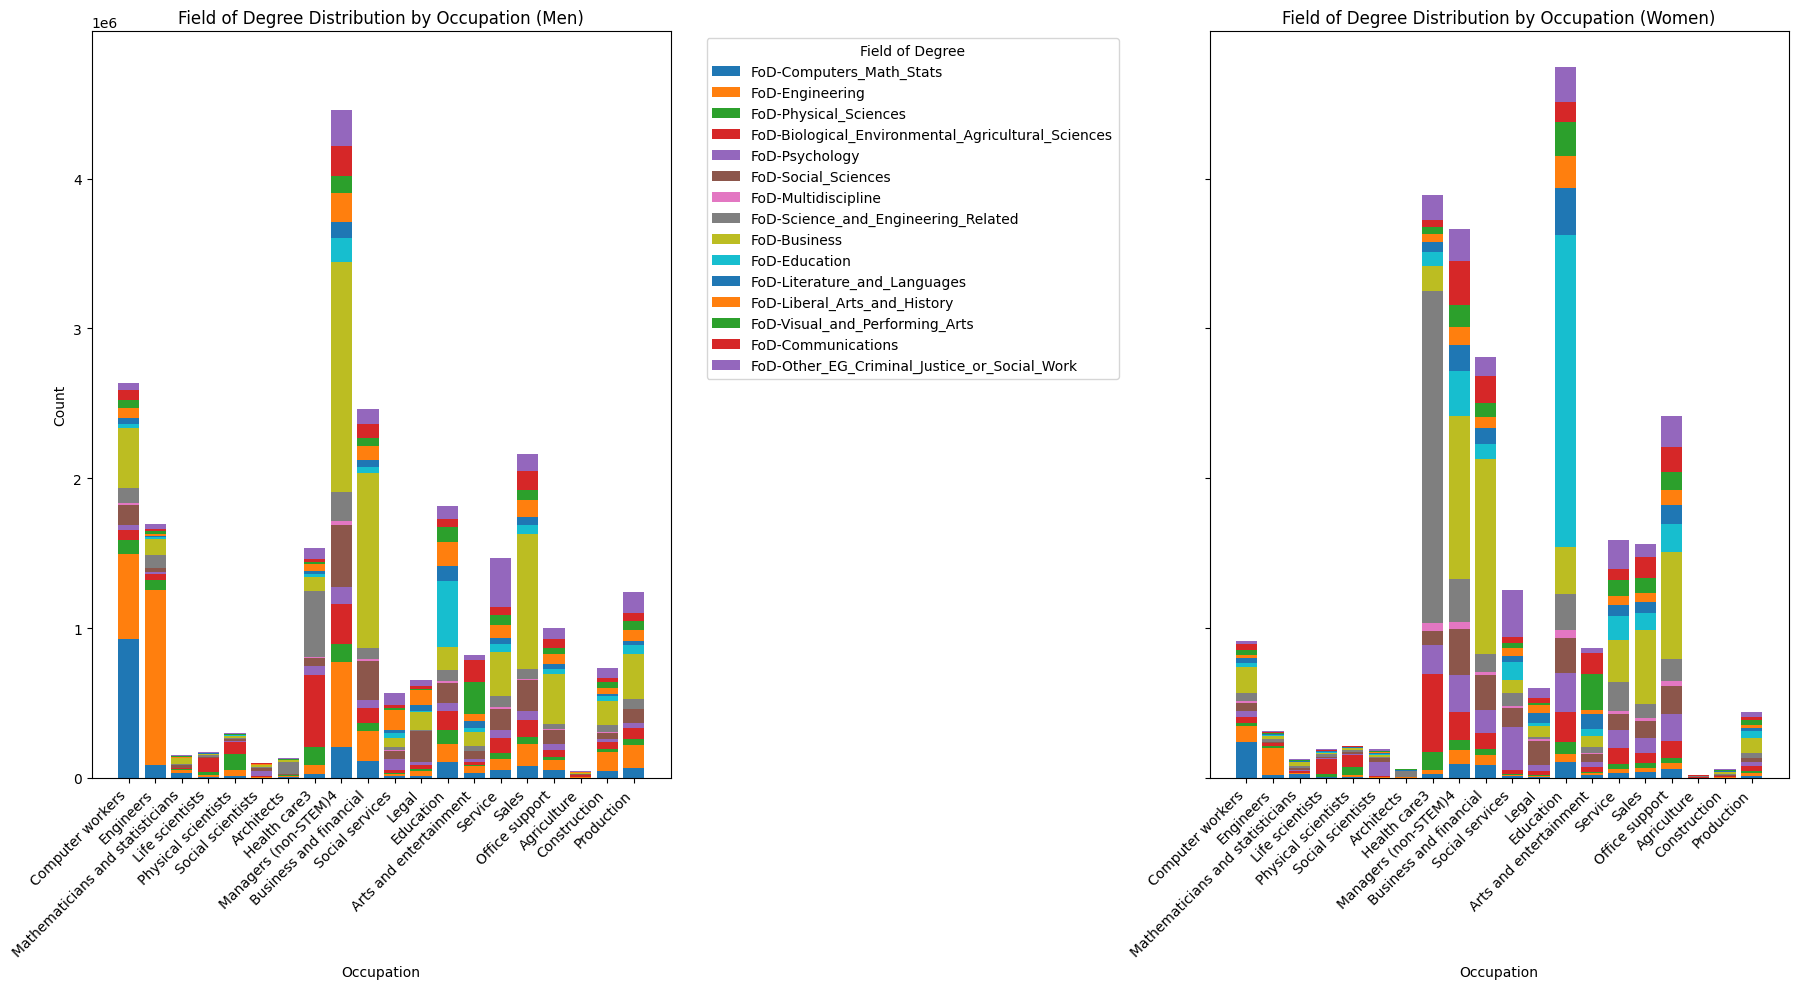

In [49]:
# Define fields of degree columns
fields = df_men_all_ed_levels.columns[1:-1]  # Excluding 'Occupation' and 'Gender'

# Set up the figure with two subplots
fig, (ax_men, ax_women) = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

# Plot for Men
bottom = None
for field in fields:
    ax_men.bar(
        df_men_all_ed_levels['Occupation'], df_men_all_ed_levels[field],
        label=field, bottom=bottom
    )
    bottom = df_men_all_ed_levels[fields[:list(fields).index(field)+1]].sum(axis=1)
ax_men.set_title("Field of Degree Distribution by Occupation (Men)")
ax_men.set_xlabel("Occupation")
ax_men.set_ylabel("Count")
ax_men.legend(title="Field of Degree", bbox_to_anchor=(1.05, 1), loc='upper left')
ax_men.set_xticks(range(len(df_men_all_ed_levels['Occupation'])))
ax_men.set_xticklabels(df_men_all_ed_levels['Occupation'], rotation=45, ha='right')

# Plot for Women
bottom = None
for field in fields:
    ax_women.bar(
        df_women_all_ed_levels['Occupation'], df_women_all_ed_levels[field],
        label=field, bottom=bottom
    )
    bottom = df_women_all_ed_levels[fields[:list(fields).index(field)+1]].sum(axis=1)
ax_women.set_title("Field of Degree Distribution by Occupation (Women)")
ax_women.set_xlabel("Occupation")
ax_women.set_xticks(range(len(df_women_all_ed_levels['Occupation'])))
ax_women.set_xticklabels(df_women_all_ed_levels['Occupation'], rotation=45, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Process the second xlsx file from the American Community Survey
- Recreate the steps used on the first file from the dataset

In [50]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-bach-degree.xlsx'

# Specify only the required columns by their indices
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the starting row and the number of rows to read
start_row = 27
num_rows = 20  # Number of rows to read after the starting row

# Load the data with only the selected columns and limit the rows
df_men_bach_degree = pd.read_excel(file_path, skiprows=start_row, nrows=num_rows, usecols=selected_columns)

# Define descriptive column names for the selected columns
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the custom column names
df_men_bach_degree.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_men_bach_degree['Occupation'] = df_men_bach_degree['Occupation'].str.lstrip(". ")

# Add a gender column
df_men_bach_degree['Gender'] = 'Male'

# Select numeric columns that need conversion to int64
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Convert selected numeric columns to int64
df_men_bach_degree[numeric_columns] = df_men_bach_degree[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_men_bach_degree.head())
print(df_men_bach_degree.tail())
print(df_men_bach_degree.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    625800   
1                         Engineers                     56800   
2  Mathematicians and statisticians                     15940   
3                   Life scientists                      2384   
4               Physical scientists                      3957   

   FoD-Engineering  FoD-Physical_Sciences  \
0           311200                  39510   
1           748300                  28969   
2             8100                   1527   
3             3942                   6336   
4            10910                  41110   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              39740            23780   
1                                              32610             5753   
2                                               3644             1507   
3                                             

In [51]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-bach-degree.xlsx'

# Specify the selected columns by their indices (same as for men)
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the header row and the number of rows for women
header_row = 49
num_rows = 20  # The same as for men

# Load the data for women with the specified columns, skipping initial rows and using the right number of rows
df_women_bach_degree = pd.read_excel(
    file_path, skiprows=header_row, nrows=num_rows, usecols=selected_columns
)

# Define descriptive column names
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the column names
df_women_bach_degree.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_women_bach_degree['Occupation'] = df_women_bach_degree['Occupation'].str.lstrip(". ")

# Add a gender column with "Female" as the value
df_women_bach_degree['Gender'] = 'Female'

# Convert numeric columns to int64 to ensure consistency with the men’s DataFrame
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]
df_women_bach_degree[numeric_columns] = df_women_bach_degree[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_women_bach_degree.head())
print(df_women_bach_degree.tail())
print(df_women_bach_degree.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    145800   
1                         Engineers                      9388   
2  Mathematicians and statisticians                     10250   
3                   Life scientists                       998   
4               Physical scientists                      1547   

   FoD-Engineering  FoD-Physical_Sciences  \
0            48869                  10060   
1           103499                   7161   
2             3298                    729   
3             2051                   5998   
4             2852                  23070   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              21549            21480   
1                                               8647             2684   
2                                               3034             4187   
3                                             

#### Process the third xlsx file from the American Community Survey
- Recreate the steps used on the first and second files from the dataset

In [52]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-grad-degree.xlsx'

# Specify only the required columns by their indices
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the starting row and the number of rows to read
start_row = 27
num_rows = 20  # Number of rows to read after the starting row

# Load the data with only the selected columns and limit the rows
df_men_grad_degree = pd.read_excel(file_path, skiprows=start_row, nrows=num_rows, usecols=selected_columns)

# Define descriptive column names for the selected columns
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the custom column names
df_men_grad_degree.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_men_grad_degree['Occupation'] = df_men_grad_degree['Occupation'].str.lstrip(". ")

# Add a gender column
df_men_grad_degree['Gender'] = 'Male'

# Select numeric columns that need conversion to int64
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Convert selected numeric columns to int64
df_men_grad_degree[numeric_columns] = df_men_grad_degree[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_men_grad_degree.head())
print(df_men_grad_degree.tail())
print(df_men_grad_degree.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                    299300   
1                         Engineers                     27230   
2  Mathematicians and statisticians                     19400   
3                   Life scientists                      2175   
4               Physical scientists                      9174   

   FoD-Engineering  FoD-Physical_Sciences  \
0           260600                  50870   
1           423700                  33460   
2             9602                   3790   
3            10029                  13100   
4            29970                  67720   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              25059            11459   
1                                              11610             2932   
2                                               3556             2163   
3                                             

In [53]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/job-by-bach-degree-field-grad-degree.xlsx'

# Specify the selected columns by their indices (same as for men)
selected_columns = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

# Define the header row and the number of rows for women
header_row = 49
num_rows = 20  # The same as for men

# Load the data for women with the specified columns, skipping initial rows and using the right number of rows
df_women_grad_degree = pd.read_excel(
    file_path, skiprows=header_row, nrows=num_rows, usecols=selected_columns
)

# Define descriptive column names
columns = [
    "Occupation", "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]

# Apply the column names
df_women_grad_degree.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
df_women_grad_degree['Occupation'] = df_women_grad_degree['Occupation'].str.lstrip(". ")

# Add a gender column with "Female" as the value
df_women_grad_degree['Gender'] = 'Female'

# Convert numeric columns to int64 to ensure consistency with the men’s DataFrame
numeric_columns = [
    "FoD-Computers_Math_Stats", "FoD-Engineering", "FoD-Physical_Sciences",
    "FoD-Biological_Environmental_Agricultural_Sciences", "FoD-Psychology",
    "FoD-Social_Sciences", "FoD-Multidiscipline", "FoD-Science_and_Engineering_Related",
    "FoD-Business", "FoD-Education", "FoD-Literature_and_Languages",
    "FoD-Liberal_Arts_and_History", "FoD-Visual_and_Performing_Arts",
    "FoD-Communications", "FoD-Other_EG_Criminal_Justice_or_Social_Work"
]
df_women_grad_degree[numeric_columns] = df_women_grad_degree[numeric_columns].astype('int64')

# Preview to confirm correct data import and types
print(df_women_grad_degree.head())
print(df_women_grad_degree.tail())
print(df_women_grad_degree.info())

                         Occupation  FoD-Computers_Math_Stats  \
0                  Computer workers                     95360   
1                         Engineers                      8196   
2  Mathematicians and statisticians                     14000   
3                   Life scientists                      1781   
4               Physical scientists                      4330   

   FoD-Engineering  FoD-Physical_Sciences  \
0            56289                  12180   
1            78880                   8045   
2             4642                   1916   
3             3828                   9018   
4            10510                  30480   

   FoD-Biological_Environmental_Agricultural_Sciences  FoD-Psychology  \
0                                              18800            14130   
1                                               6386             2321   
2                                               5228             3797   
3                                             

#### Process the 4th xlsx file from the American Community Survey

In [54]:
# Define the path to the file
file_path = './data/from-college-to-jobs-acs-2019/med-earn-by-degree-level-field-and-occupation.xlsx'

# Define the columns to read (based on the specified indices)
selected_columns = [0, 1, 3, 5, 7, 9, 11]

# Define column names for the data
columns = [
    "Occupation", "STEM Major All Degrees", "non-STEM Major All Degrees",
    "STEM Major Bachelors", "non-STEM Major Bachelors",
    "STEM Major Graduate Degree", "non-STEM Major Graduate Degree"
]

# Load the data for men
start_row_men = 16  
num_rows_men = 7  # Number of rows for the men's data section
male_median_earnings = pd.read_excel(file_path, skiprows=start_row_men, nrows=num_rows_men, usecols=selected_columns)
male_median_earnings.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
male_median_earnings['Occupation'] = male_median_earnings['Occupation'].str.lstrip(". ")

male_median_earnings['Gender'] = 'Male'

# Load the data for women
start_row_women = start_row_men + num_rows_men + 2  
num_rows_women = 7  # Number of rows for the women's data section
female_median_earnings = pd.read_excel(file_path, skiprows=start_row_women, nrows=num_rows_women, usecols=selected_columns)
female_median_earnings.columns = columns

# Remove any leading dots or whitespace from the 'Occupation' column
female_median_earnings['Occupation'] = female_median_earnings['Occupation'].str.lstrip(". ")

female_median_earnings['Gender'] = 'Female'

# Preview the results to confirm
print("Men's Median Earnings DataFrame:")
display(male_median_earnings.head(6))
print("Women's Median Earnings DataFrame:")
display(female_median_earnings.head(6))


Men's Median Earnings DataFrame:


,Occupation,STEM Major All Degrees,non-STEM Major All Degrees,STEM Major Bachelors,non-STEM Major Bachelors,STEM Major Graduate Degree,non-STEM Major Graduate Degree,Gender
0,Computer Workers,110000.0,95270.0,101300.0,90670.0,122100.0,107100.0,Male
1,Engineers,104400.0,91320.0,100000.0,86040.0,121300.0,106400.0,Male
2,Mathematicians and statisticians,100900.0,91210.0,87850.0,88160.0,111100.0,95890.0,Male
3,Life scientists,68810.0,65500.0,61150.0,54390.0,77440.0,97520.0,Male
4,Physical scientists,90890.0,78160.0,75080.0,74810.0,102100.0,89050.0,Male
5,Social scientists,92510.0,81110.0,76670.0,73960.0,100200.0,85070.0,Male


Women's Median Earnings DataFrame:


,Occupation,STEM Major All Degrees,non-STEM Major All Degrees,STEM Major Bachelors,non-STEM Major Bachelors,STEM Major Graduate Degree,non-STEM Major Graduate Degree,Gender
0,Computer Workers,96990.0,82870.0,90840.0,80480.0,101800.0,92440.0,Female
1,Engineers,97000.0,76100.0,87460.0,72310.0,103500.0,91300.0,Female
2,Mathematicians and statisticians,92350.0,78640.0,87210.0,75300.0,97850.0,87820.0,Female
3,Life scientists,65300.0,67210.0,57450.0,61630.0,72550.0,81790.0,Female
4,Physical scientists,75200.0,69650.0,62670.0,63300.0,86430.0,77930.0,Female
5,Social scientists,78780.0,75590.0,69560.0,66300.0,80070.0,78980.0,Female


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

- https://it4063c.github.io/course-notes/working-with-data/data-sources for methods to import the various data types  
- https://www.kaggle.com/datasets/hackerrank/developer-survey-2018/data for the Kaggle dataset 
- https://www.pewresearch.org/social-trends/2018/01/09/women-and-men-in-stem-often-at-odds-over-workplace-equity/  for the link to the Pew Research Survey
- https://ncses.nsf.gov/pubs/nsb20212/participation-of-demographic-groups-in-stem for the html scraped dataset
- https://ncses.nsf.gov/pubs/nsb20212/downloads for additional tables that were not part of the html scrape
- https://www.census.gov/library/stories/2021/06/does-majoring-in-stem-lead-to-stem-job-after-graduation.html for the links to the American Community Survey 2019
- IT4075 Applied Machine Learning zyBooks for data classification logic and code
- https://medium.com/@acceldia/python-101-reading-excel-and-spss-files-with-pandas-eed6d0441c0b to learn how to work with .sav files
- https://python-docx.readthedocs.io/en/latest/user/documents.html to learn how to work with .docx files inside Python
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html to learn how to create and edit a seaborn FacetGrid
- ChatGPT to troubleshoot visualizations (such as legends not showing correctly, labels partially hidden, and correcting sort order of categorical data)
- https://stackoverflow.com/questions/1388450/giving-graphs-a-subtitle to learn how to add titles and subtitles to matplotlib visualizations
- https://www.color-hex.com/color-palettes/ to choose consistent color palette for visualizations

In [55]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 101737 bytes to source.py
